<a href="https://colab.research.google.com/github/kanra20/PhDSatisfaction/blob/main/PhdProject_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay

## Data import

In [ ]:
url = 'https://github.com/kanra20/PhDSatisfaction/blob/main/Dataset/data2018.csv?raw=true'
df = pd.read_csv(url, index_col=0)

###selected variables
variables_list=['q1_1', 'q1_2', 'q1_3_1', 'q1_3_2', 'q1_3_3_r', 'q2_1', 'q2_2', 'q2_3_3', 'q2_4_1', 'q2_4_2', 'q2_5_1', 'q2_5_2', 'q2_6_1', 'q2_6_2', 'q2_7_1', 'q3_1', 'q4_1_1', 'q4_1_2', 'q4_1_3', 'q4_2_1', 'q4_2_2', 'q4_3', 'q4_4_1', 'q4_5']
df_new = df[variables_list]
df_new

,q1_1,q1_2,q1_3_1,q1_3_2,q1_3_3_r,q2_1,q2_2,q2_3_3,q2_4_1,q2_4_2,...,q2_7_1,q3_1,q4_1_1,q4_1_2,q4_1_3,q4_2_1,q4_2_2,q4_3,q4_4_1,q4_5
no,,,,,,,,,,,,,,,,,,,,,
4569,1,5,2,1,2,2,2,2,1,1,...,5,1,1,1,3,3,31,2,1,1
4691,1,2,2,1,2,1,1,2,1,2,...,1,1,1,1,3,3,32,1,1,1
3560,2,4,2,1,2,1,2,1,1,2,...,1,5,1,1,4,2,21,1,2,5
3081,2,3,1,1,2,1,3,1,5,1,...,7,4,1,2,3,1,11,4,2,4
4849,1,2,2,1,2,1,2,2,1,1,...,5,3,1,1,2,1,12,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,2,5,2,1,2,1,2,2,3,1,...,4,3,1,1,4,1,11,2,1,2
2643,2,4,2,1,2,1,3,1,1,1,...,7,5,1,1,2,1,11,3,1,3
2840,1,5,2,1,2,1,2,2,1,1,...,1,4,1,1,3,1,11,4,1,6


In [ ]:
X=['Gender', 'Age', 'MarriageStatus', 'IsMarried', 'MarriageChildStatus', 'EnterAge', 'GraduateAge',
          'BreakFromSchool', 'InstitutionType', 'MasterPhDSchoolMatch', 'MajorField', 'MajorRelevance',
          'WorkedOrNot', 'EmploymentStatus', 'PhDMotivation', 'CurrentJobStatus', 'JobType', 'JobObtain',
          'CurrentInstitutionType', 'CurrentJobPosition', 'CareerPlanMatch','JobSatisfaction']

In [ ]:
#Rename the column names
new_column_names = {
    'q1_1': 'Gender',
    'q1_2': 'Age',
    'q1_3_1': 'MarriageStatus', #您目前的婚姻狀態
    'q1_3_2': 'IsMarried', #決定進修博士時的婚姻狀態
    'q1_3_3_r': 'MarriageChildStatus', #決定進修博士當時的婚姻與子女狀態
    'q2_1': 'EnterAge', #入學年齡
    'q2_2': 'GraduateAge', #畢業年齡
    'q2_3_3': 'BreakFromSchool', #是否曾休學
    'q2_4_1': 'InstitutionType', #學校類型
    'q2_4_2': 'MasterPhDSchoolMatch', #博士學位學校與碩士學校是否相同
    'q2_5_1': 'MajorField', #就讀科系
    'q2_5_2': 'MajorRelevance', #博士學位科系與學/碩士科系的相關性為
    'q2_6_1': 'WorkedOrNot', #就學身份
    'q2_6_2': 'EmploymentStatus', #修讀博士學位時的主要就學身分為
    'q2_7_1': 'PhDMotivation', #除個人興趣以外，就讀博士的首要動機為
    'q3_1': 'ProgramSatisfaction', #y1  #您對博士修業整體滿意度為
    'q4_1_1': 'CurrentJobStatus', #目前就業情況為
    'q4_1_2': 'JobType', #工作類型
    'q4_1_3': 'JobObtain', #此工作為
    'q4_2_1': 'CurrentInstitutionType', #目前工作的機構別為
    'q4_2_2': 'CurrentJobPosition', #目前工作的職業別為
    'q4_3': 'JobSatisfaction', #您對目前工作的滿意度為何
    'q4_4_1': 'CareerPlanMatch', #博士規劃是否與工作符合
    'q4_5': 'DegreeBenefit' #y2  #整體而言您認為您的博士學位效益如何
}

# Rename the columns
df_new.rename(columns = new_column_names, inplace=True)
print(df_new.head(5))

      Gender  Age  MarriageStatus  IsMarried  MarriageChildStatus  EnterAge  \
no                                                                            
4569       1    5               2          1                    2         2   
4691       1    2               2          1                    2         1   
3560       2    4               2          1                    2         1   
3081       2    3               1          1                    2         1   
4849       1    2               2          1                    2         1   

      GraduateAge  BreakFromSchool  InstitutionType  MasterPhDSchoolMatch  \
no                                                                          
4569            2                2                1                     1   
4691            1                2                1                     2   
3560            2                1                1                     2   
3081            3                1                5          

<ipython-input-4-f1de7767b225>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = new_column_names, inplace=True)


In [ ]:
for column in df_new.columns:
    print(f"Column: {column}")
    print(df_new[column].unique())
    print("\n")

Column: Gender
[1 2]


Column: Age
[5 2 4 3 7 6 1 8 9]


Column: MarriageStatus
[2 1]


Column: IsMarried
[1 2]


Column: MarriageChildStatus
[2 3 4 1]


Column: EnterAge
[2 1 3 4 5 7 6]


Column: GraduateAge
[2 1 3 4 5 6 7 8]


Column: BreakFromSchool
[2 1]


Column: InstitutionType
[1 5 7 3 2 4 6]


Column: MasterPhDSchoolMatch
[ 1  2 99]


Column: MajorField
[22 12 60 44 14 43 71 15 21 72 73 40 24 65 45 41 11 10 76 64 50 77 79 16
 28 82 53 27 70 74 56 62 51 42 39 29 20 46 47 23 17 30 25 19 13 52 49 54
 69 80 78 81 75 89 59 63 55 61 26]


Column: MajorRelevance
[ 1 99  2  5  3  4]


Column: WorkedOrNot
[2 1]


Column: EmploymentStatus
[2 1]


Column: PhDMotivation
[ 5  1  7  4 10  3  6  9  8  2]


Column: ProgramSatisfaction
[1 5 4 3 2 6]


Column: CurrentJobStatus
[1 3 2 4]


Column: JobType
[ 1  2 98  3]


Column: JobObtain
[ 3  4  2 98  1]


Column: CurrentInstitutionType
[ 3  2  1 98  6  5  4  9  7]


Column: CurrentJobPosition
[ 31  32  21  11  12  98  63  62  51  41 999  71  72

##Data Cleaning

In [ ]:
#把有N/A和沒有意見的資料刪掉，並把98替換成0（表示沒有工作）
df_new_cleaned = df_new[(df_new != 99).all(axis=1) & (df_new != 999).all(axis=1)]
df_new_cleaned = df_new_cleaned[(df_new_cleaned['ProgramSatisfaction'] != 6) & (df_new_cleaned['JobSatisfaction'] != 6) & (df_new_cleaned['DegreeBenefit'] != 6)]
df_new_cleaned = df_new_cleaned.replace(98, 0)

#把滿意度和效益的數值反過來（5表示非常滿意，1表示非常不滿意）
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df_new_cleaned['ProgramSatisfaction'] = df_new_cleaned['ProgramSatisfaction'].replace(mapping)
df_new_cleaned['JobSatisfaction'] = df_new_cleaned['JobSatisfaction'].replace(mapping)
df_new_cleaned['DegreeBenefit'] = df_new_cleaned['DegreeBenefit'].replace(mapping)

In [ ]:
df_new_cleaned.shape
#刪掉有遺漏值的資料後剩下4674筆資料

(4674, 24)

In [ ]:
for column in df_new_cleaned.columns:
    print(f"Column: {column}")
    print(df_new_cleaned[column].unique())
    print("\n")

Column: Gender
[1 2]


Column: Age
[5 2 4 3 7 6 1 8 9]


Column: MarriageStatus
[2 1]


Column: IsMarried
[1 2]


Column: MarriageChildStatus
[2 3 4 1]


Column: EnterAge
[2 1 3 4 5 7 6]


Column: GraduateAge
[2 1 3 4 5 6 7 8]


Column: BreakFromSchool
[2 1]


Column: InstitutionType
[1 5 7 3 2 4 6]


Column: MasterPhDSchoolMatch
[1 2]


Column: MajorField
[22 12 60 44 43 71 21 72 73 40 24 65 45 41 11 10 76 64 50 15 77 79 16 14
 82 53 27 70 28 74 56 62 51 42 39 29 20 46 47 23 17 30 25 19 13 52 49 54
 69 80 78 81 75 89 59 63 55 61 26]


Column: MajorRelevance
[1 2 5 3 4]


Column: WorkedOrNot
[2 1]


Column: EmploymentStatus
[2 1]


Column: PhDMotivation
[ 5  1  7  4 10  3  6  9  8  2]


Column: ProgramSatisfaction
[5 1 2 4 3]


Column: CurrentJobStatus
[1 3 2 4]


Column: JobType
[1 2 0 3]


Column: JobObtain
[3 4 0 2 1]


Column: CurrentInstitutionType
[3 2 1 0 6 5 4 7]


Column: CurrentJobPosition
[31 32 21 11 12  0 63 62 51 41 71 72 61 69 52 54 53 42 44 43 49 33 22 13
 79 23]


Colu

In [ ]:
y1 = df_new_cleaned['ProgramSatisfaction']
y2 = df_new_cleaned['DegreeBenefit']

In [ ]:
# prompt: merge y1 and y2 in y
import pandas as pd
y = pd.concat([y1, y2], axis=1)
y

,ProgramSatisfaction,DegreeBenefit
no,,
4569,5,5
4691,5,5
3560,1,1
3081,2,2
2737,4,4
...,...,...
2498,4,4
2712,3,4
2643,1,3


###X and Y1 and Y2

In [ ]:
X = df_new_cleaned.drop(['ProgramSatisfaction', 'DegreeBenefit'], axis = 1)
X

,Gender,Age,MarriageStatus,IsMarried,MarriageChildStatus,EnterAge,GraduateAge,BreakFromSchool,InstitutionType,MasterPhDSchoolMatch,...,WorkedOrNot,EmploymentStatus,PhDMotivation,CurrentJobStatus,JobType,JobObtain,CurrentInstitutionType,CurrentJobPosition,JobSatisfaction,CareerPlanMatch
no,,,,,,,,,,,,,,,,,,,,,
4569,1,5,2,1,2,2,2,2,1,1,...,2,2,5,1,1,3,3,31,4,1
4691,1,2,2,1,2,1,1,2,1,2,...,1,2,1,1,1,3,3,32,5,1
3560,2,4,2,1,2,1,2,1,1,2,...,1,2,1,1,1,4,2,21,5,2
3081,2,3,1,1,2,1,3,1,5,1,...,2,2,7,1,2,3,1,11,2,2
2737,2,3,1,1,2,1,2,1,1,1,...,2,2,4,1,2,3,1,11,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,1,5,2,2,3,3,4,2,1,1,...,2,2,7,1,1,3,1,11,3,1
2712,2,5,2,1,2,1,2,2,3,1,...,2,1,4,1,1,4,1,11,4,1
2643,2,4,2,1,2,1,3,1,1,1,...,1,2,7,1,1,2,1,11,3,1


In [ ]:
X.shape

(4674, 22)

In [ ]:
y1.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(
    X, y1,
    test_size = .25,
    random_state = 48,
    stratify = y1)

X_train, X_test, y2_train, y2_test = train_test_split(
    X, y2,
    test_size = .25,
    random_state = 48,
    stratify = y2)

###X1 and Y1

In [ ]:
X1=X.drop(['CurrentJobStatus','JobType','JobObtain','CurrentInstitutionType','CurrentJobPosition','JobSatisfaction','CareerPlanMatch'],axis=1)
X1

,Gender,Age,MarriageStatus,IsMarried,MarriageChildStatus,EnterAge,GraduateAge,BreakFromSchool,InstitutionType,MasterPhDSchoolMatch,MajorField,MajorRelevance,WorkedOrNot,EmploymentStatus,PhDMotivation
no,,,,,,,,,,,,,,,
4569,1,5,2,1,2,2,2,2,1,1,22,1,2,2,5
4691,1,2,2,1,2,1,1,2,1,2,12,1,1,2,1
3560,2,4,2,1,2,1,2,1,1,2,60,1,1,2,1
3081,2,3,1,1,2,1,3,1,5,1,44,1,2,2,7
2737,2,3,1,1,2,1,2,1,1,1,43,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,1,5,2,2,3,3,4,2,1,1,22,2,2,2,7
2712,2,5,2,1,2,1,2,2,3,1,60,1,2,1,4
2643,2,4,2,1,2,1,3,1,1,1,20,3,1,2,7


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1,
    test_size = .25,
    random_state = 48,
    stratify = y1)

###X2 and Y2

In [ ]:
X2=X.drop(['EnterAge',
        'GraduateAge',
        'BreakFromSchool',
        'InstitutionType',
        'MasterPhDSchoolMatch',
        'MajorField',
        'MajorRelevance',
        'WorkedOrNot',
        'EmploymentStatus',
        'PhDMotivation'],axis=1)
X2

,Gender,Age,MarriageStatus,IsMarried,MarriageChildStatus,CurrentJobStatus,JobType,JobObtain,CurrentInstitutionType,CurrentJobPosition,JobSatisfaction,CareerPlanMatch
no,,,,,,,,,,,,
4569,1,5,2,1,2,1,1,3,3,31,4,1
4691,1,2,2,1,2,1,1,3,3,32,5,1
3560,2,4,2,1,2,1,1,4,2,21,5,2
3081,2,3,1,1,2,1,2,3,1,11,2,2
2737,2,3,1,1,2,1,2,3,1,11,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2498,1,5,2,2,3,1,1,3,1,11,3,1
2712,2,5,2,1,2,1,1,4,1,11,4,1
2643,2,4,2,1,2,1,1,2,1,11,3,1


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size = .25,
    random_state = 48,
    stratify = y2)

In [ ]:
results = {}

## Linear Regression

### linear regression

In [ ]:
# Create an empty dictionary to store results
results = {}

In [ ]:

# 定義一般線性回歸模型的函式
def run_linear_regression_model(X, y, test_size=0.25, random_state=48, n_splits=5, n_repeats=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state)

    # Define a column transformer that applies OneHotEncoder to all columns
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ], remainder='passthrough')

    # Set up the Linear Regression pipeline with the column transformer
    linear_pipeline = Pipeline(
        steps=[
            ("transformer", transformer),
            ("estimator", LinearRegression())
        ]
    )


    # Fit the model
    linear_pipeline.fit(X_train, y_train)

    # Evaluate the model's performance
    linear_estimator = linear_pipeline
    print("R^2 on Training Data: %.3f" % r2_score(y_train, linear_estimator.predict(X_train)))
    r2= r2_score(y_test, linear_estimator.predict(X_test))
    mse = mean_squared_error(y_test, linear_estimator.predict(X_test))
    print("R^2 on Test Data: %.3f" % r2_score(y_test, linear_estimator.predict(X_test)))
    print("MSE on Training Data: %.3f" % mean_squared_error(y_train, linear_estimator.predict(X_train)))
    print("MSE on Test Data: %.3f" % mean_squared_error(y_test, linear_estimator.predict(X_test)))

    feature_names = linear_estimator.named_steps['transformer'].named_transformers_['cat'].get_feature_names_out(X.columns)

    # Get feature names after OneHotEncoding
    #feature_names = transformer.named_transformers_['cat'].get_feature_names_out(X.columns)

    # Plot feature importances using permutation importance
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    linear_pfi_sklearn = permutation_importance(
        linear_estimator,
        X_test,
        y_test,
        scoring=mse_scorer,
        n_repeats=n_repeats,
        random_state=random_state)

    plt.figure(figsize=(32, 8))
    _ = pd.Series(linear_pfi_sklearn.importances_mean, index=X.columns).plot.bar(rot=70)
    plt.show()

    return linear_estimator, r2,mse, linear_pfi_sklearn  # Return necessary variables

# 假設 X 和 y 已經定義
# best_linear_model, X_train, y_train, X_test, y_test = run_linear_regression_model(X, y)


In [ ]:
transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ], remainder='passthrough')

    # Set up the Linear Regression pipeline with the column transformer
linear_pipeline = Pipeline(
        steps=[
            ("transformer", transformer),
            ("estimator", LinearRegression())
        ]
    )

R^2 on Training Data: 0.260
R^2 on Test Data: 0.223
MSE on Training Data: 0.572
MSE on Test Data: 0.610


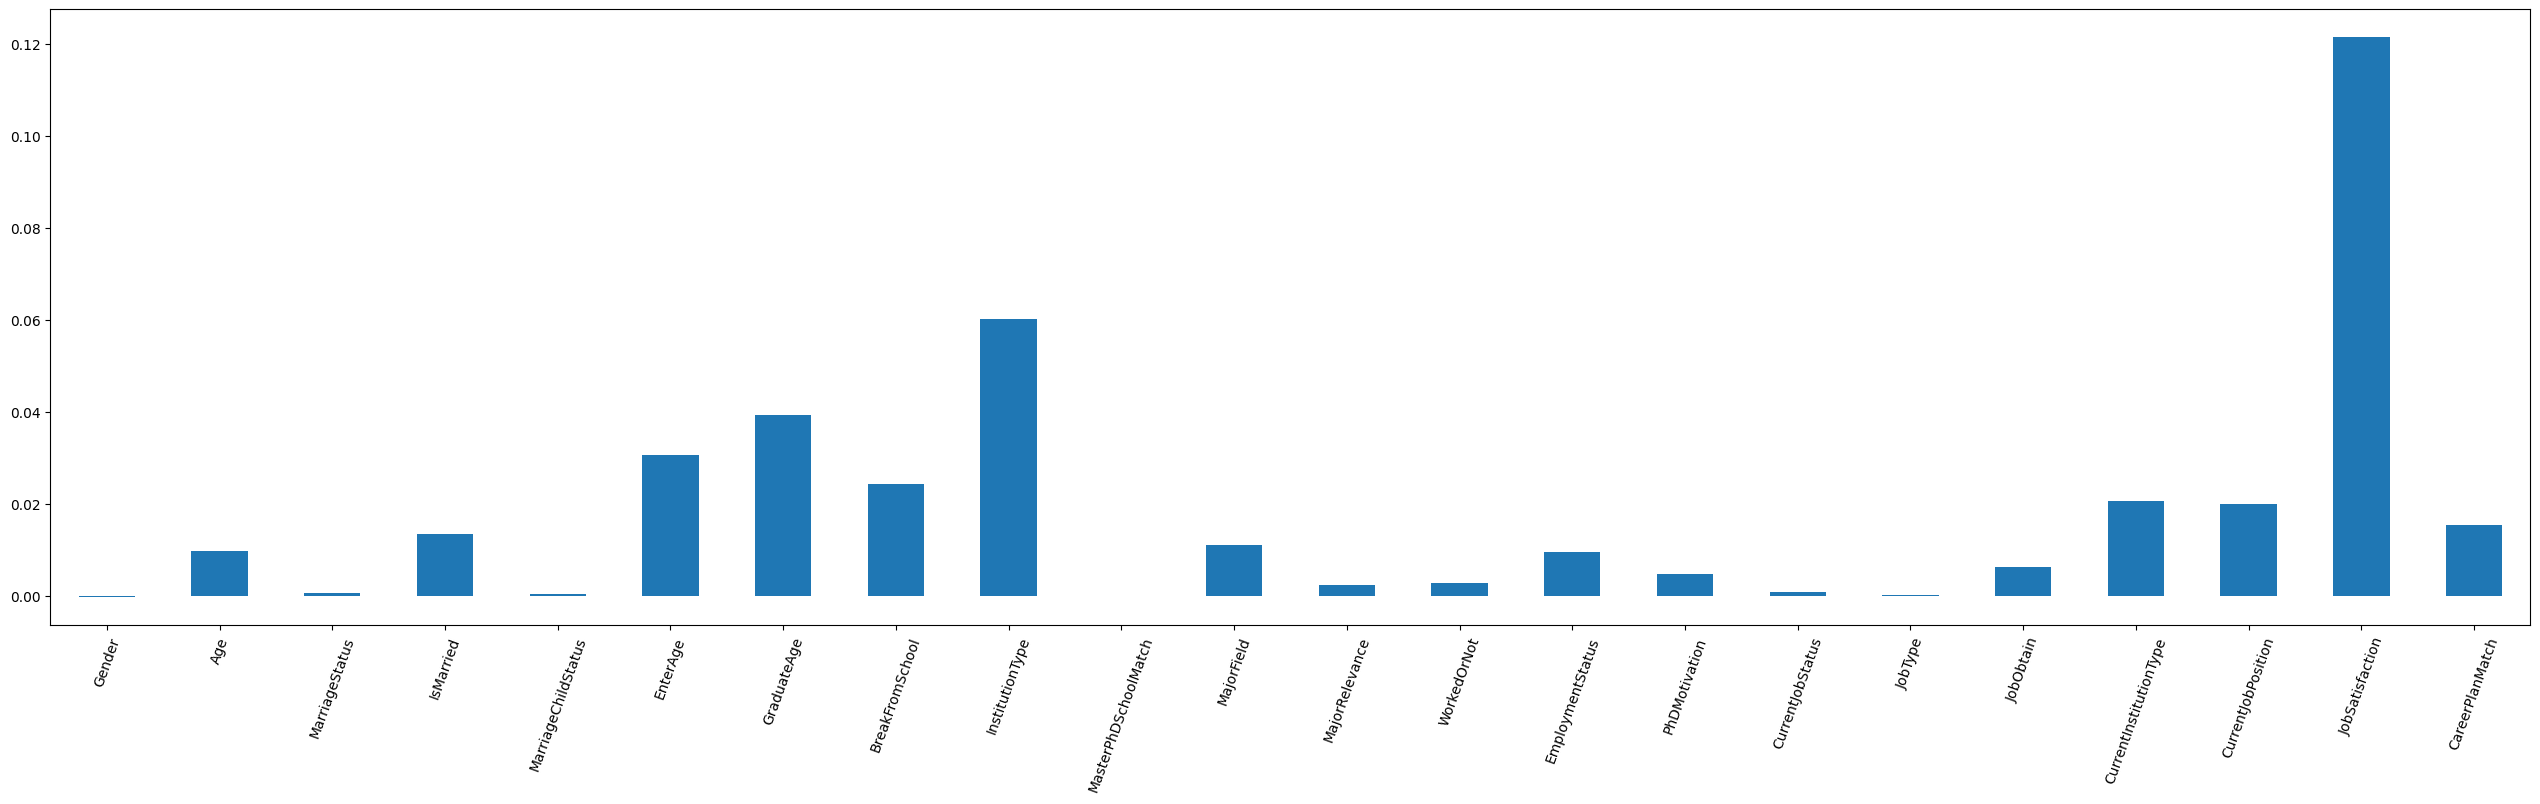

In [ ]:
linear_modely1, r2,mse, linear_pfi_sklearn= run_linear_regression_model(X, y1)
results['linear_modely1'] = {
    'r2': r2,
    'mse': mse
}

R^2 on Training Data: 0.418
R^2 on Test Data: 0.434
MSE on Training Data: 0.557
MSE on Test Data: 0.526


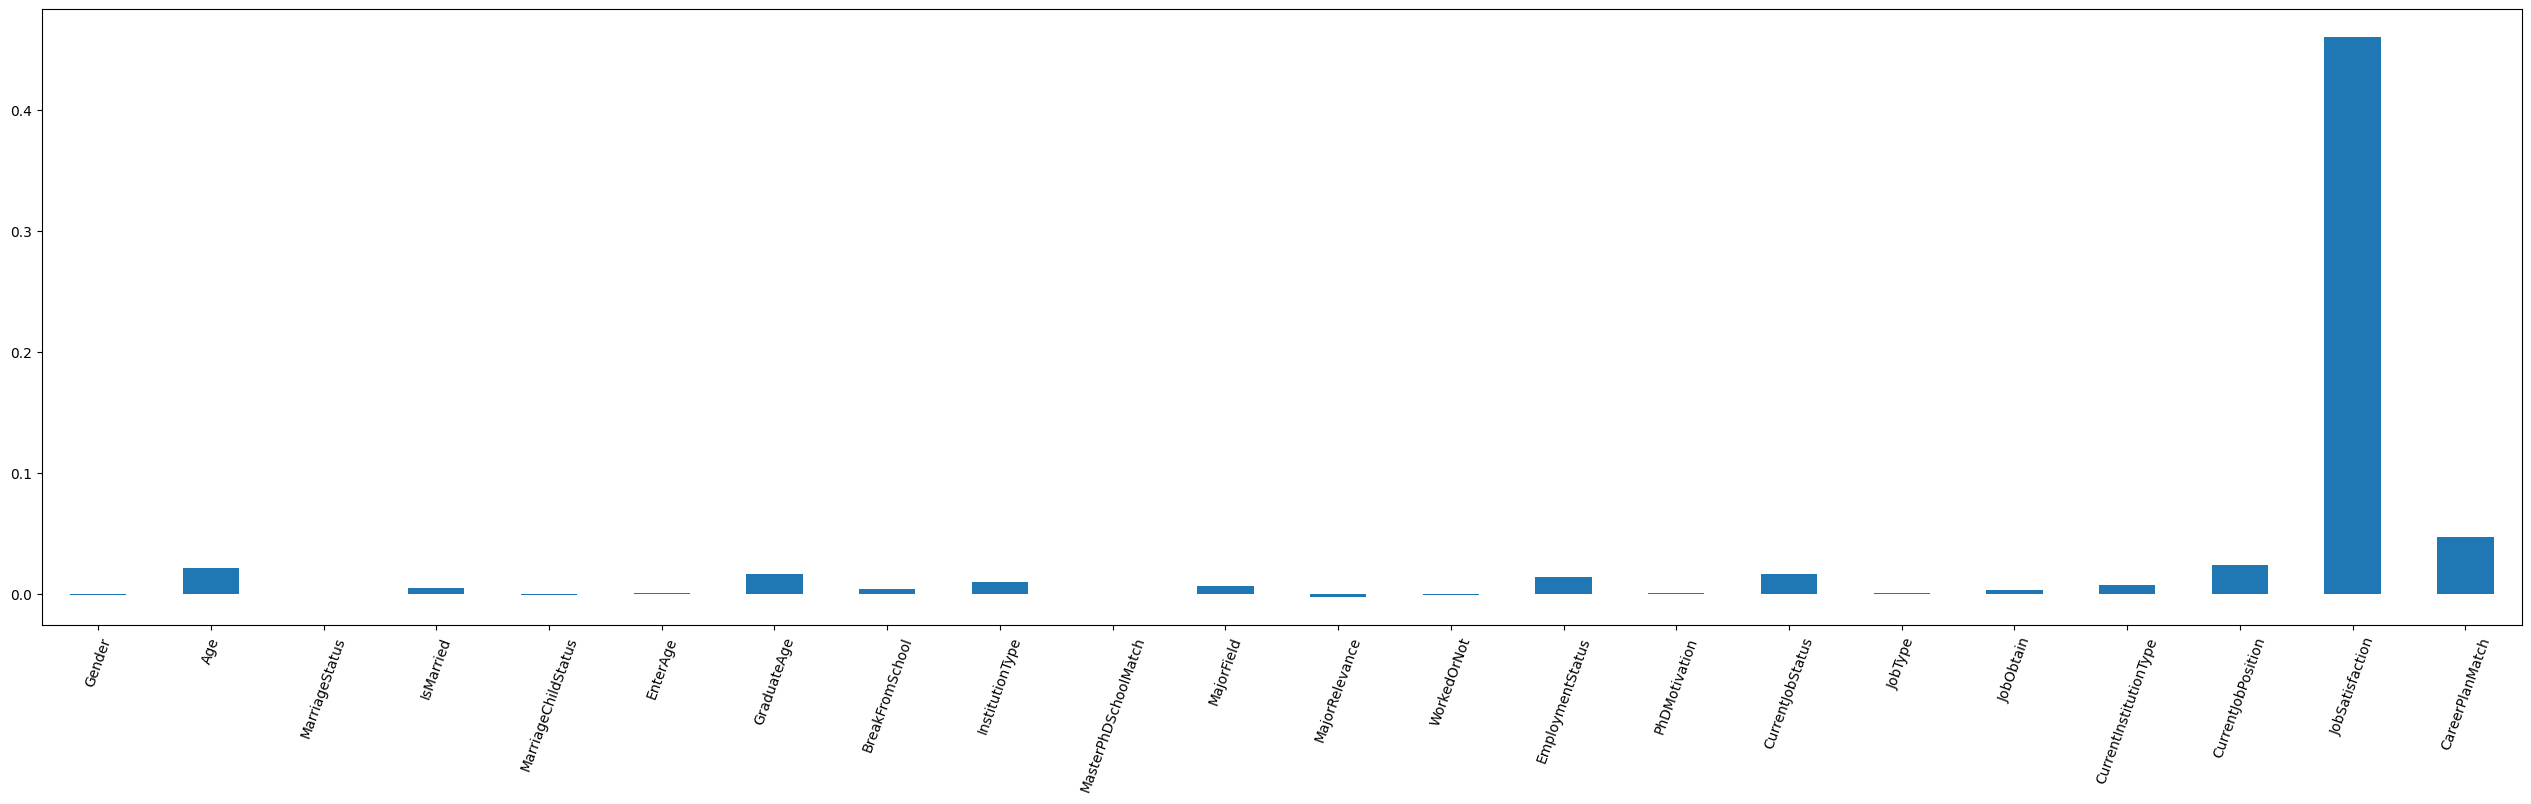

In [ ]:
linear_modely2, r2,mse, linear_pfi_sklearn= run_linear_regression_model(X, y2)
results['linear_modely2'] = {
    'r2': r2,
    'mse': mse
}

### 用了 LASSO 的 linear regression

In [ ]:
#定義lasso函式
def run_lasso_model(X, y, test_size=0.25, random_state=48, n_splits=5, n_repeats=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state)

# Define a column transformer that applies OneHotEncoder to all columns
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])

    # Set up the Lasso pipeline with the column transformer
    lasso_pipeline = Pipeline(
        steps=[
            ("transformer", transformer),
            ("estimator", Lasso(max_iter=10000))
        ])


    # Set up the parameter grid for Lasso
    lasso_param_grid = {"estimator__alpha": np.logspace(-.01, -4, 100)}

    # Set up the KFold splitter
    splitter = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Set up the GridSearchCV
    lasso_searcher = GridSearchCV(
        estimator=lasso_pipeline,
        param_grid=lasso_param_grid,
        scoring='r2',
        refit=True,
        cv=splitter)

    # Fit the model
    lasso_searcher.fit(X_train, y_train)

    # Print best params and best score
    print("Best Params:", lasso_searcher.best_params_)
    print("Best CV Score:", lasso_searcher.best_score_)

    # Evaluate the model's performance
    best_lasso_estimator = lasso_searcher.best_estimator_
    print("R^2 on Training Data: %.3f" % r2_score(y_train, best_lasso_estimator.predict(X_train)))
    print("R^2 on Test Data: %.3f" % r2_score(y_test, best_lasso_estimator.predict(X_test)))
    print("MSE on Training Data: %.3f" % mean_squared_error(y_train, best_lasso_estimator.predict(X_train)))
    print("MSE on Test Data: %.3f" % mean_squared_error(y_test, best_lasso_estimator.predict(X_test)))
    r2_test = r2_score(y_test, best_lasso_estimator.predict(X_test))
    mse_test = mean_squared_error(y_test, best_lasso_estimator.predict(X_test))

    # Plot feature importances using permutation importance
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    lasso_pfi_sklearn = permutation_importance(
        best_lasso_estimator,
        X_test,
        y_test,
        scoring=mse_scorer,
        n_repeats=n_repeats,
        random_state=random_state)

    plt.figure(figsize=(32, 8))
    _ = pd.Series(lasso_pfi_sklearn.importances_mean, index=X.columns).plot.bar(rot=70)
    plt.show()

    return best_lasso_estimator, r2_test,mse_test  # Return necessary variables

####X on Y1

Best Params: {'estimator__alpha': 0.0030989325323911767}
Best CV Score: 0.20180279742926496
R^2 on Training Data: 0.231
R^2 on Test Data: 0.239
MSE on Training Data: 0.595
MSE on Test Data: 0.598


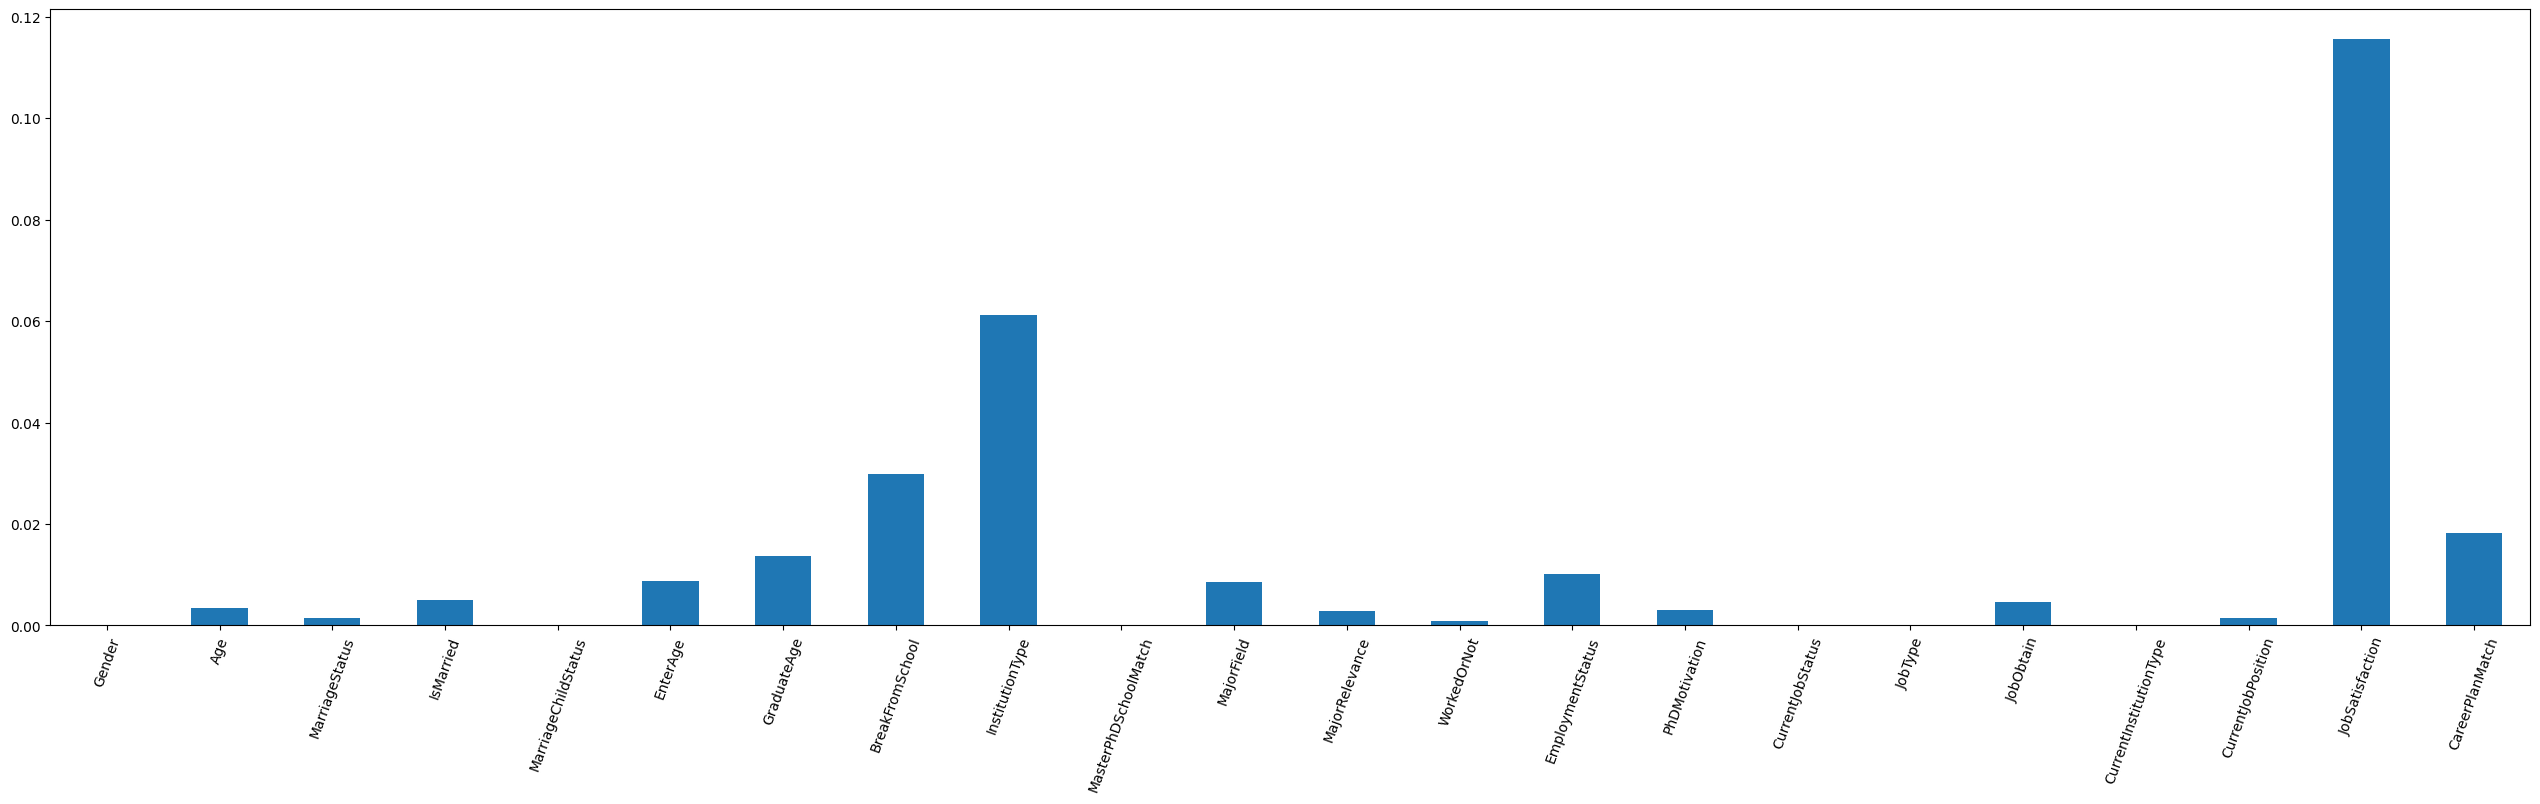

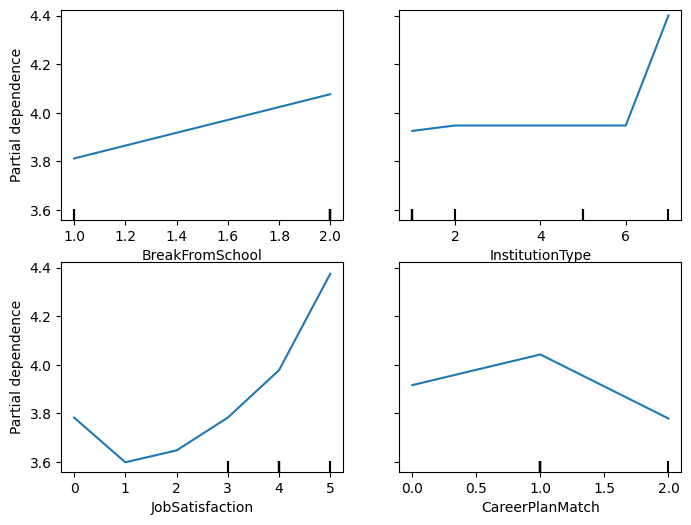

In [ ]:
# Usage example:
lasso_modely1, r2_test,mse_test = run_lasso_model(X, y1)
results['lasso_modely1'] = {
    'r2': r2_test,
    'mse': mse_test
}



####X on Y2

Best Params: {'estimator__alpha': 0.0023458650789331794}
Best CV Score: 0.3798065616277918
R^2 on Training Data: 0.400
R^2 on Test Data: 0.447
MSE on Training Data: 0.575
MSE on Test Data: 0.514


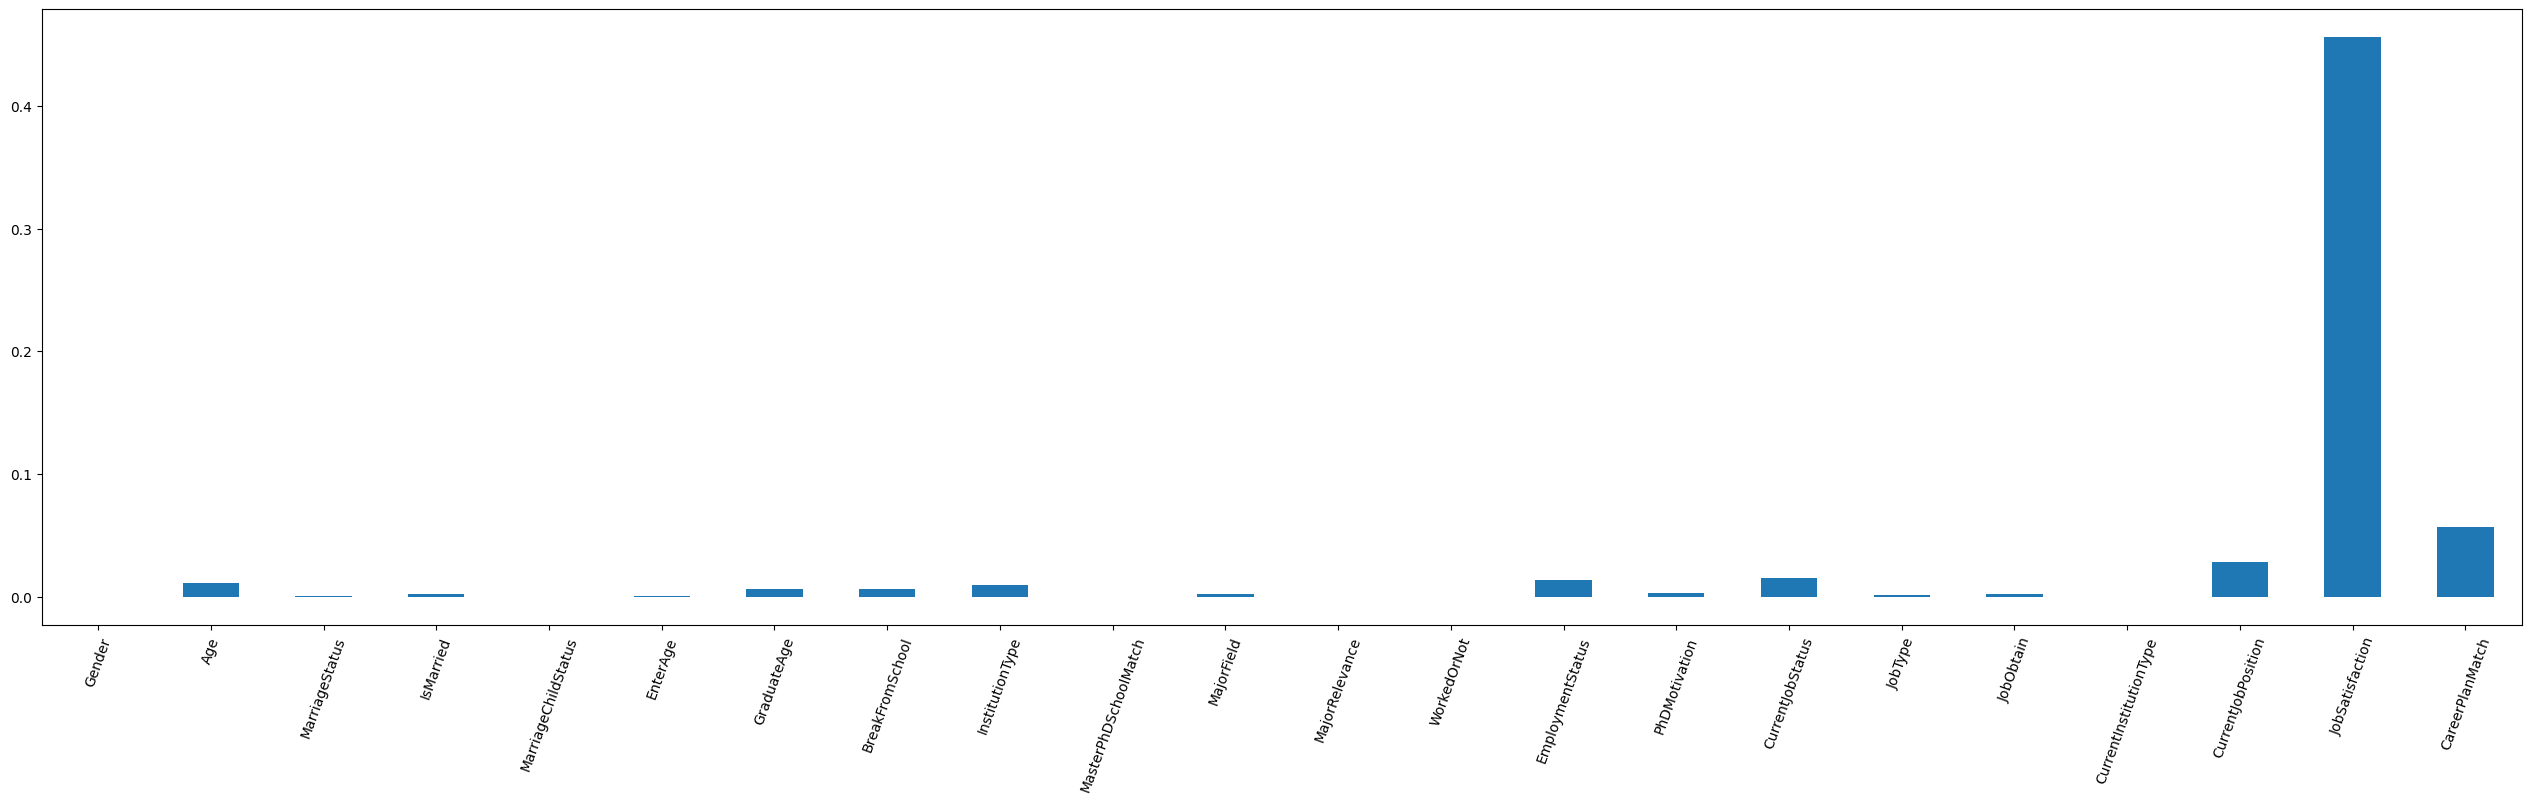

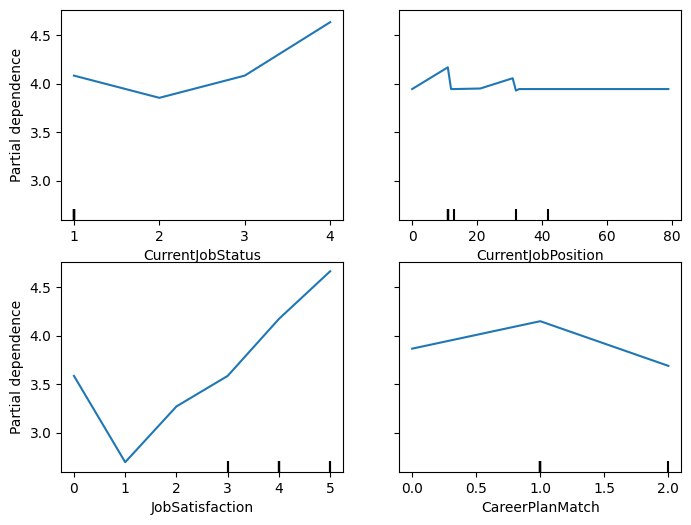

In [ ]:
# Usage example:
lasso_modely2, r2_test,mse_test = run_lasso_model(X, y2)
results['lasso_modely2'] = {
    'r2': r2_test,
    'mse': mse_test
}

### 用了 Ridge 的 linear regression

In [ ]:
def run_ridge_model(X, y, test_size=0.25, random_state=48, n_splits=5, n_repeats=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state)

    # Define a column transformer that applies OneHotEncoder to all columns
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])

    # Set up the Ridge pipeline with the column transformer
    ridge_pipeline = Pipeline(
        steps=[
            ("transformer", transformer),
            ("estimator", Ridge(max_iter=10000))
        ])

    # Set up the parameter grid for Ridge
    ridge_param_grid = {"estimator__alpha": np.logspace(-.01, -4, 100)}

    # Set up the KFold splitter
    splitter = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Set up the GridSearchCV
    ridge_searcher = GridSearchCV(
        estimator=ridge_pipeline,
        param_grid=ridge_param_grid,
        scoring='r2',
        refit=True,
        cv=splitter)

    # Fit the model
    ridge_searcher.fit(X_train, y_train)

    # Print best params and best score
    print("Best Params:", ridge_searcher.best_params_)
    print("Best CV Score:", ridge_searcher.best_score_)

    # Evaluate the model's performance
    best_ridge_estimator = ridge_searcher.best_estimator_
    print("R^2 on Training Data: %.3f" % r2_score(y_train, best_ridge_estimator.predict(X_train)))
    print("R^2 on Test Data: %.3f" % r2_score(y_test, best_ridge_estimator.predict(X_test)))
    print("MSE on Training Data: %.3f" % mean_squared_error(y_train, best_ridge_estimator.predict(X_train)))
    print("MSE on Test Data: %.3f" % mean_squared_error(y_test, best_ridge_estimator.predict(X_test)))
    r2_test = r2_score(y_test, best_ridge_estimator.predict(X_test))
    mse_test = mean_squared_error(y_test, best_ridge_estimator.predict(X_test))

    # Plot feature importances using permutation importance
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    ridge_pfi_sklearn = permutation_importance(
        best_ridge_estimator,
        X_test,
        y_test,
        scoring=mse_scorer,
        n_repeats=n_repeats,
        random_state=random_state)

    plt.figure(figsize=(32, 8))
    _ = pd.Series(ridge_pfi_sklearn.importances_mean, index=X.columns).plot.bar(rot=70)
    plt.show()

    return best_ridge_estimator, r2_test,mse_test  # Return necessary variables


####X on Y1

Best Params: {'estimator__alpha': 0.9772372209558107}
Best CV Score: 0.17470124848239288
R^2 on Training Data: 0.260
R^2 on Test Data: 0.228
MSE on Training Data: 0.573
MSE on Test Data: 0.607


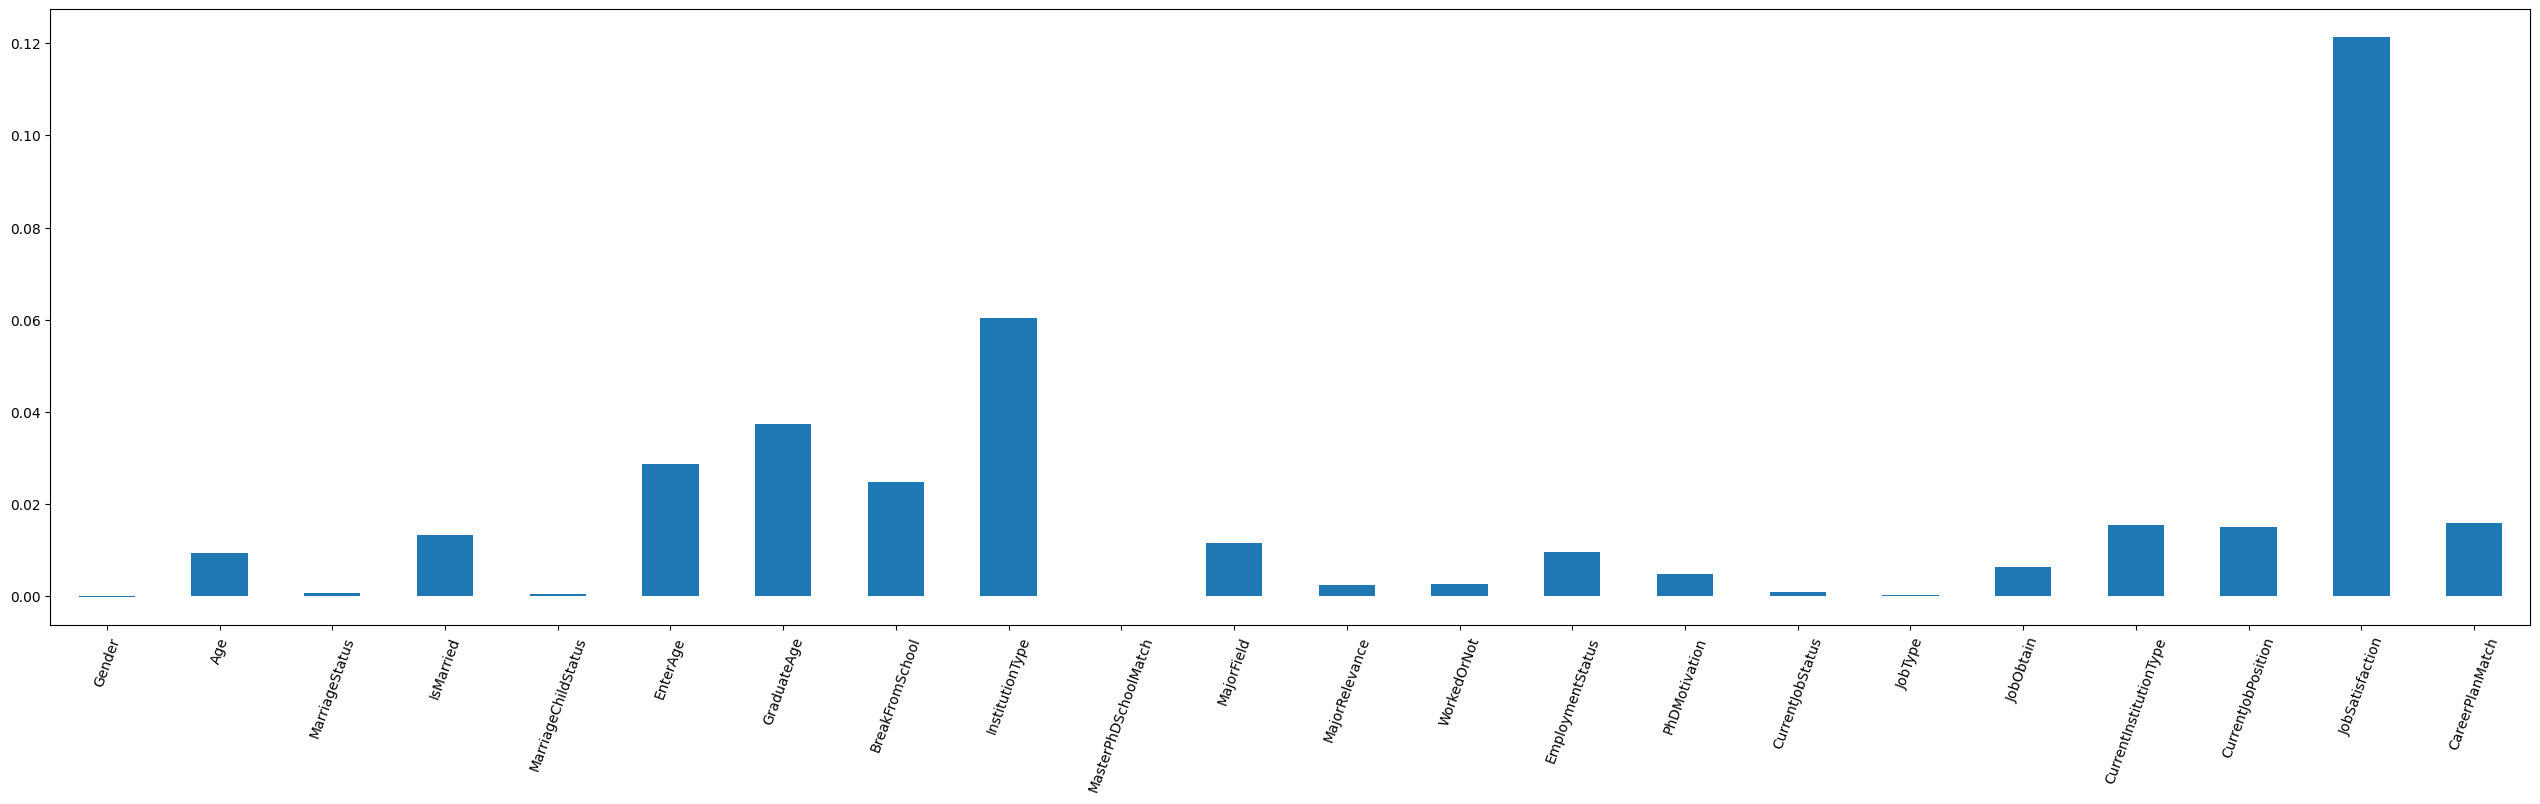

In [ ]:
ridge_modely1, r2_test,mse_test = run_ridge_model(X, y1)
results['Ridge_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}

####X on Y2

Best Params: {'estimator__alpha': 0.9772372209558107}
Best CV Score: 0.3583496273959727
R^2 on Training Data: 0.418
R^2 on Test Data: 0.437
MSE on Training Data: 0.557
MSE on Test Data: 0.523


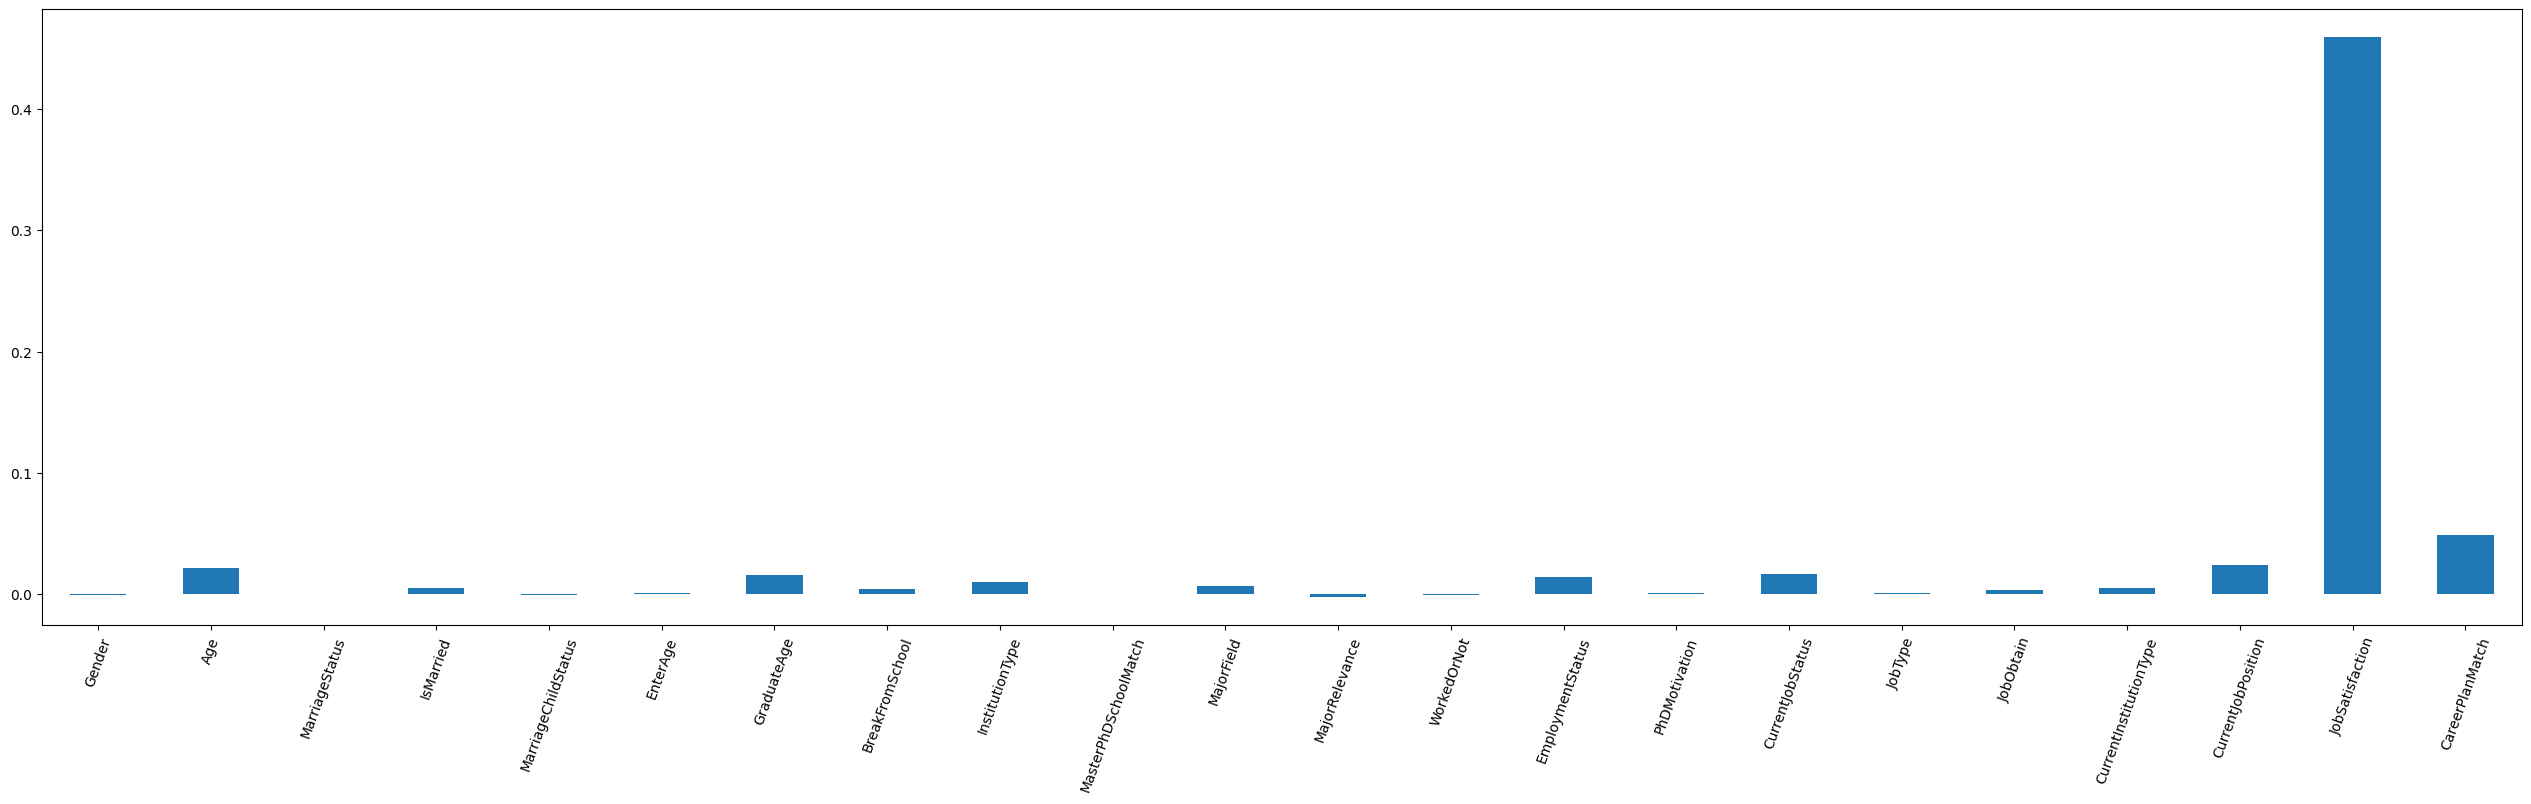

In [ ]:
ridge_modely2,r2_test,mse_test = run_ridge_model(X, y2)
results['Ridge_y2'] = {
    'r2': r2_test,
    'mse': mse_test
}

##KNN

In [ ]:
def run_knn_model(X, y, test_size=0.25, random_state=48, n_splits=5, n_repeats=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y)
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])


    # Set up the KNN pipeline
    knn_pipeline = Pipeline(steps=[
        ('transformer', transformer),
        ('knn', KNeighborsRegressor(weights="uniform", algorithm="auto"))
    ])

    # Set up the parameter grid for KNN
    knn_param_grid = {"knn__n_neighbors": np.arange(1, 50, 2)}

    # Set up the KFold splitter
    splitter = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Set up the GridSearchCV
    knn_searcher = GridSearchCV(
        estimator=knn_pipeline,
        param_grid=knn_param_grid,
        scoring='r2',
        refit=True,
        cv=splitter)

    # Fit the model
    knn_searcher.fit(X_train, y_train)

    # Evaluate the model
    best_knn_estimator = knn_searcher.best_estimator_
    print("Best Params: ", knn_searcher.best_params_)
    print("Best CV Score: ", knn_searcher.best_score_)
    print("R^2 on Training Data: %.3f" % r2_score(y_train, best_knn_estimator.predict(X_train)))
    print("R^2 on Testing Data: %.3f" % r2_score(y_test, best_knn_estimator.predict(X_test)))
    r2_test = r2_score(y_test, best_knn_estimator.predict(X_test))
    mse_test = mean_squared_error(y_test, best_knn_estimator.predict(X_test))

    # Plot feature importances using permutation importance
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    knn_pfi_sklearn = permutation_importance(
        best_knn_estimator,
        X_test,
        y_test,
        scoring=mse_scorer,
        n_repeats=n_repeats,
        random_state=random_state)

    plt.figure(figsize=(32, 8))
    _ = pd.Series(knn_pfi_sklearn.importances_mean, index=X.columns).plot.bar(rot=70)
    plt.show()

    return best_knn_estimator, r2_test,mse_test

In [ ]:
def predict_knn_model(model, X_train, y_train, X_test, y_test):
    # Predict using the best KNN estimator on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print("\nMSE on Training Data: %.3f" % mse_train)
    print("MSE on Test Data: %.3f" % mse_test)
    print("R^2 on Training Data: %.3f" % r2_score(y_train, y_train_pred))
    print("R^2 on Test Data: %.3f" % r2_score(y_test, y_test_pred))

    return y_train_pred, y_test_pred


####X on Y1

Best Params:  {'knn__n_neighbors': 41}
Best CV Score:  0.14101790720059076
R^2 on Training Data: 0.179
R^2 on Testing Data: 0.131


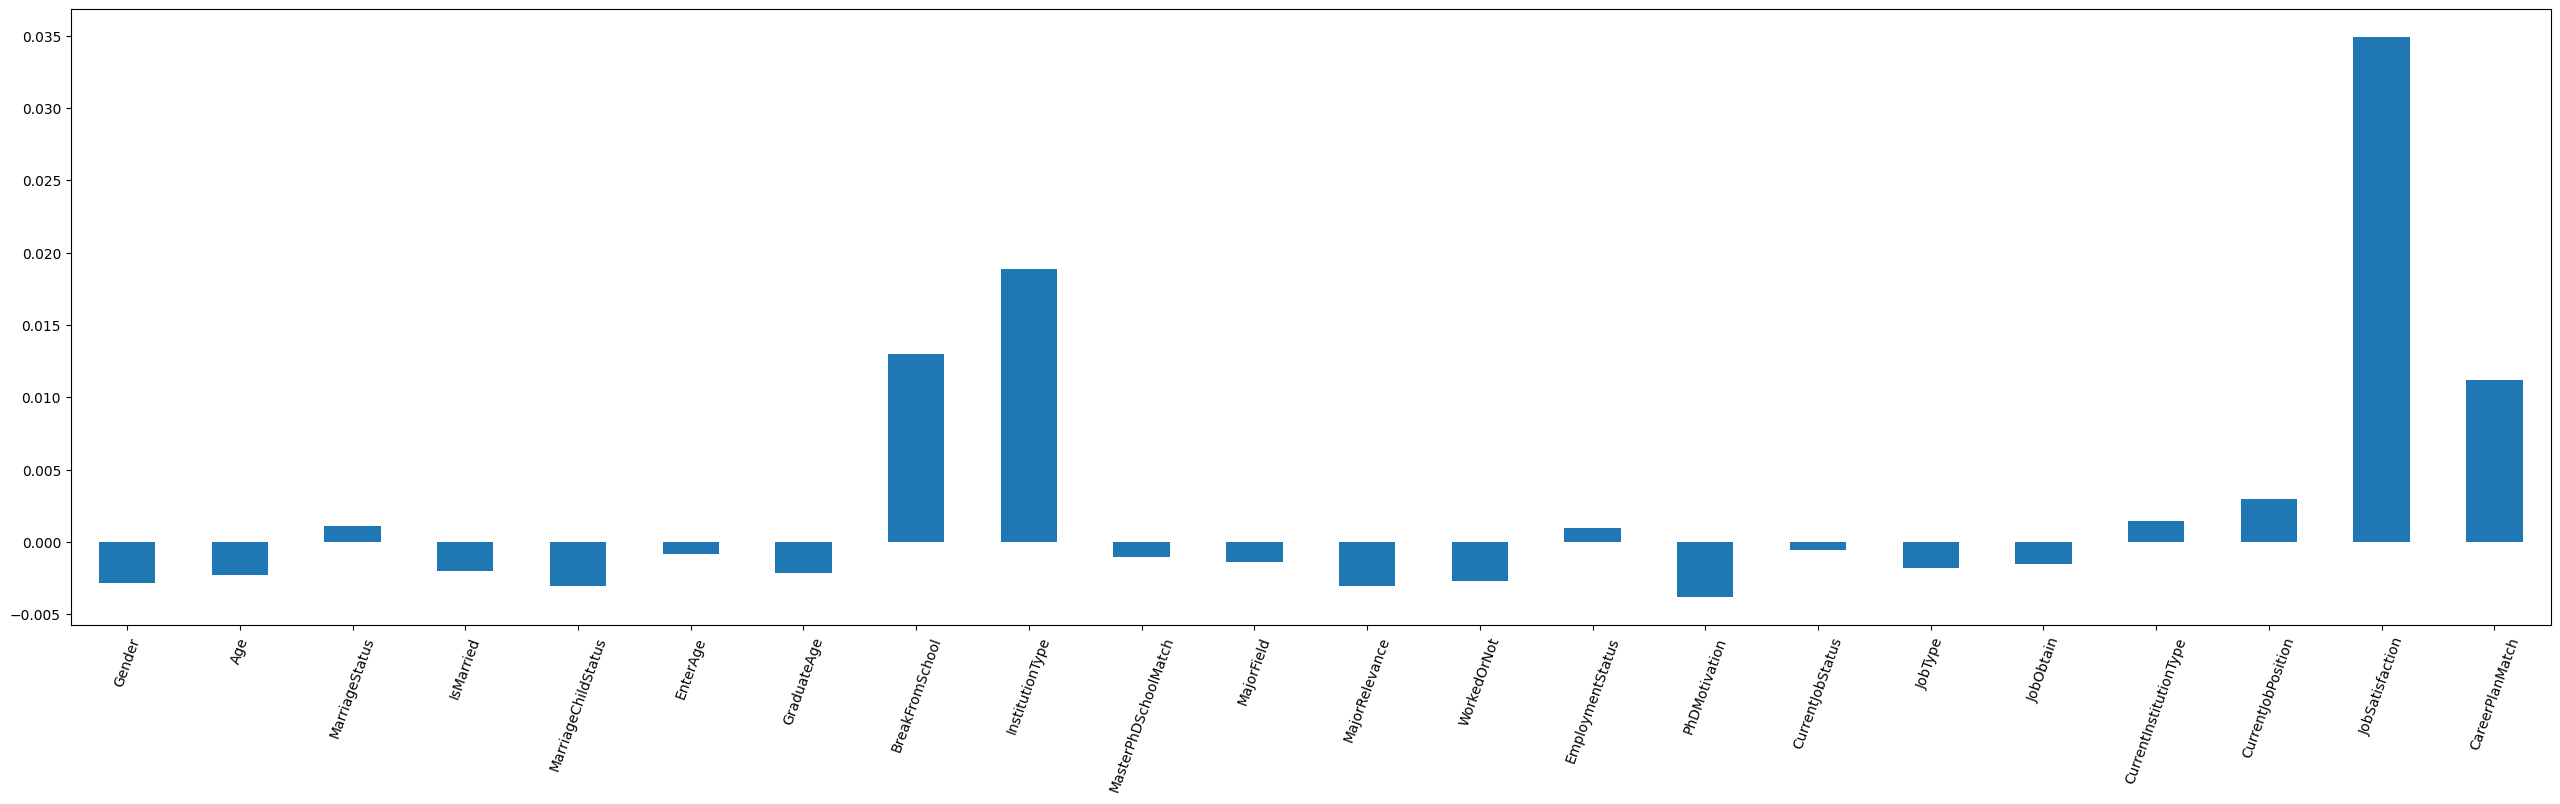

In [ ]:
# Run the KNN model for y1
knn_model_y1, r2_test,mse_test = run_knn_model(X, y1)
results['KNN_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}



####X on Y2 Prediction

Best Params:  {'knn__n_neighbors': 25}
Best CV Score:  0.2077436628580492
R^2 on Training Data: 0.275
R^2 on Testing Data: 0.252


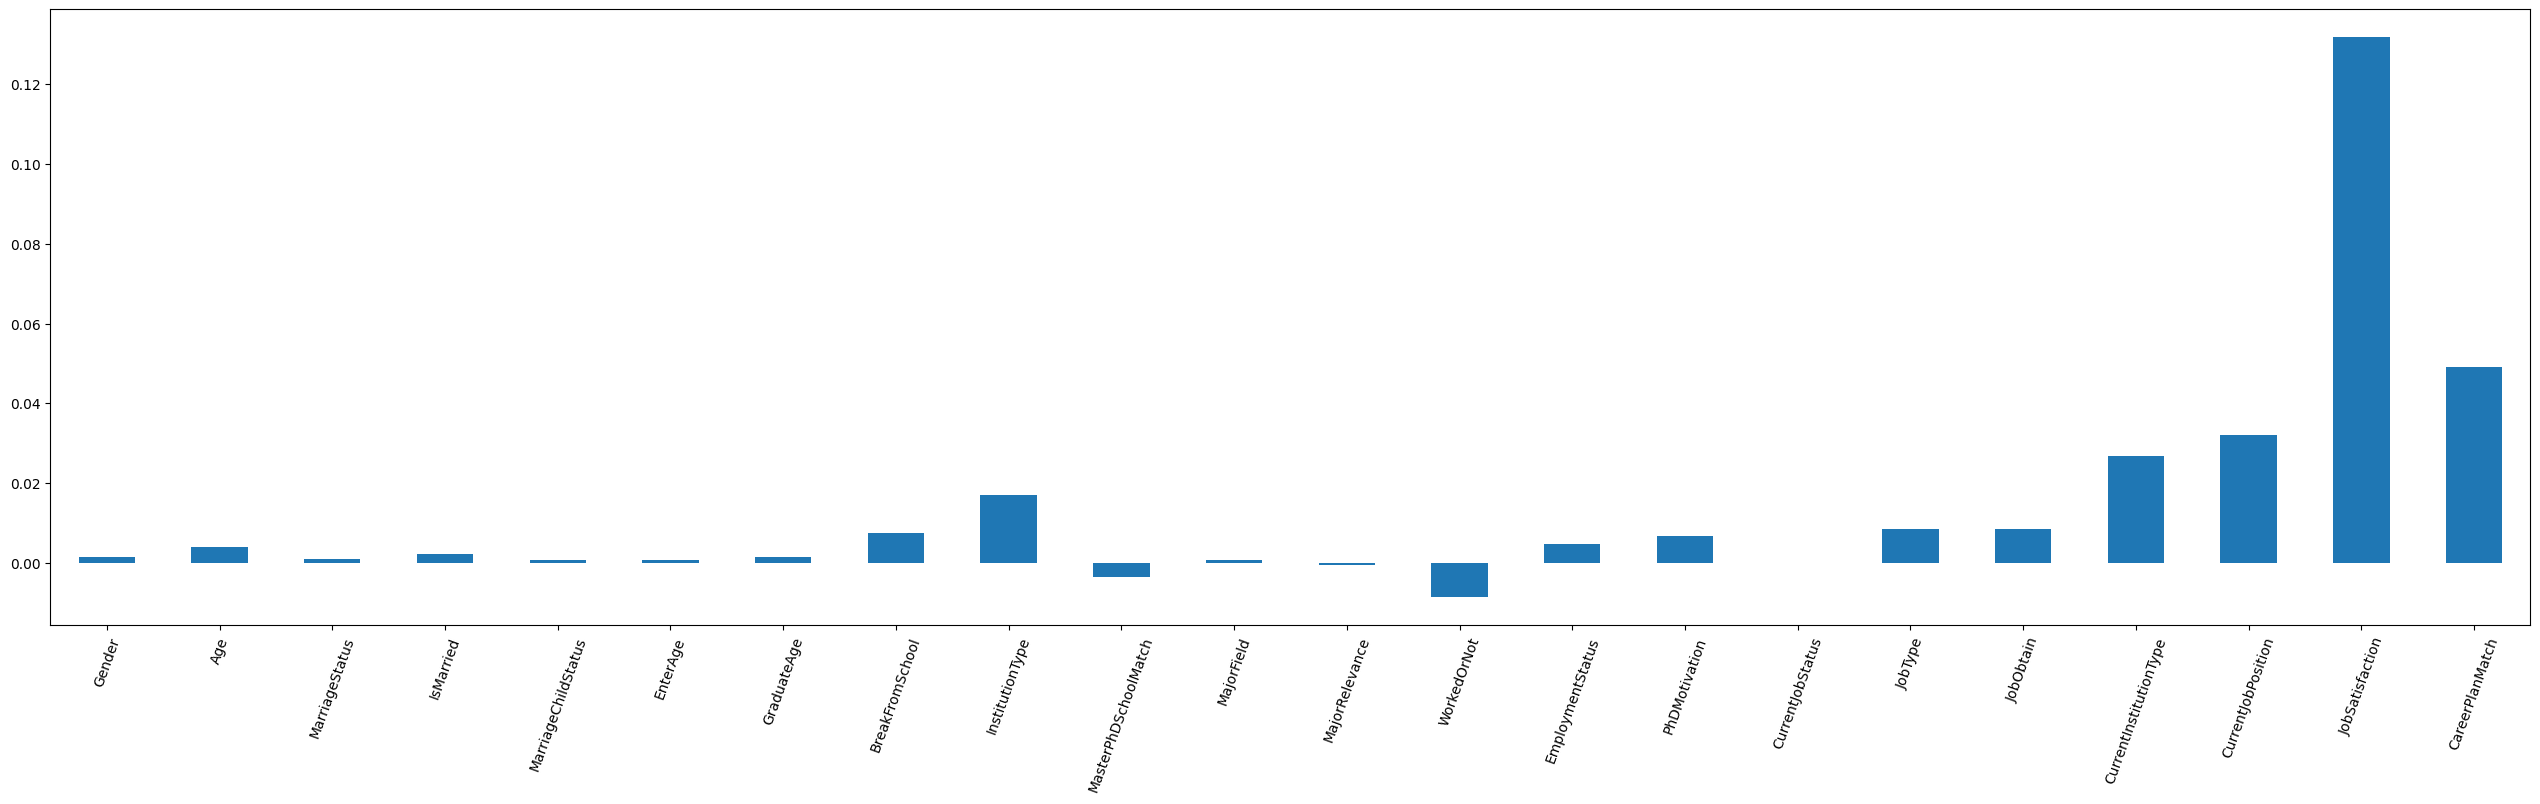

In [ ]:
# Run the KNN model for y2
knn_model_y2, r2_test,mse_test = run_knn_model(X, y2)
results['KNN_y2'] = {
    'r2': r2_test,
    'mse': mse_test
}


## Decision Tree

In [ ]:
def run_decision_tree_model(X, y, test_size=0.25, random_state=48):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state)

    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])

    # Define Decision Tree Estimator
    dt_estimator = DecisionTreeRegressor(criterion='squared_error', ccp_alpha=0.015)

    # Define Pipeline
    dt_pipeline = Pipeline(
        steps=[("transformer", transformer),
               ("estimator", dt_estimator)])

    # Fit the model
    dt_pipeline.fit(X_train, y_train)

    # Evaluate the model's performance
    train_r2 = r2_score(y_train, dt_pipeline.predict(X_train))
    test_r2 = r2_score(y_test, dt_pipeline.predict(X_test))

    train_mse = mean_squared_error(y_train, dt_pipeline.predict(X_train))
    test_mse = mean_squared_error(y_test, dt_pipeline.predict(X_test))
    print(f"R^2 on Training Data: {train_r2:.3f}")
    print(f"R^2 on Test Data: {test_r2:.3f}")
    print(f"MSE on Training Data: {train_mse:.3f}")
    print(f"MSE on Test Data: {test_mse:.3f}")

    # Plot feature importances
    transformed_feature_names = dt_pipeline["transformer"].get_feature_names_out()
    transformed_feature_names = [transformed_feature_name.split("__")[-1] for transformed_feature_name in transformed_feature_names]
    feature_importances = permutation_importance(dt_pipeline, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=100, random_state=48)
    pd.Series(feature_importances.importances_mean, index=X.columns).plot(kind='bar', rot=70)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importances")
    plt.show()

    # Plot decision tree
    plt.figure(figsize=(12, 8))
    _ = plot_tree(dt_pipeline["estimator"], feature_names=transformed_feature_names, filled=True)
    plt.show()

    return dt_pipeline, test_r2, test_mse

#### X on y1

R^2 on Training Data: 0.156
R^2 on Test Data: 0.148
MSE on Training Data: 0.653
MSE on Test Data: 0.669


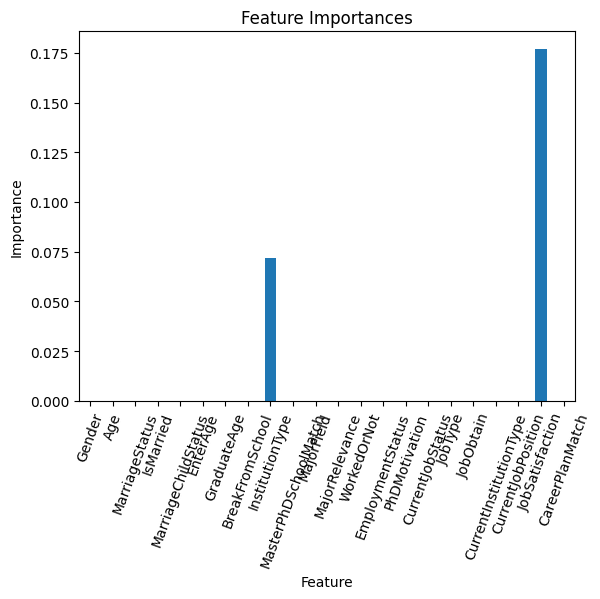

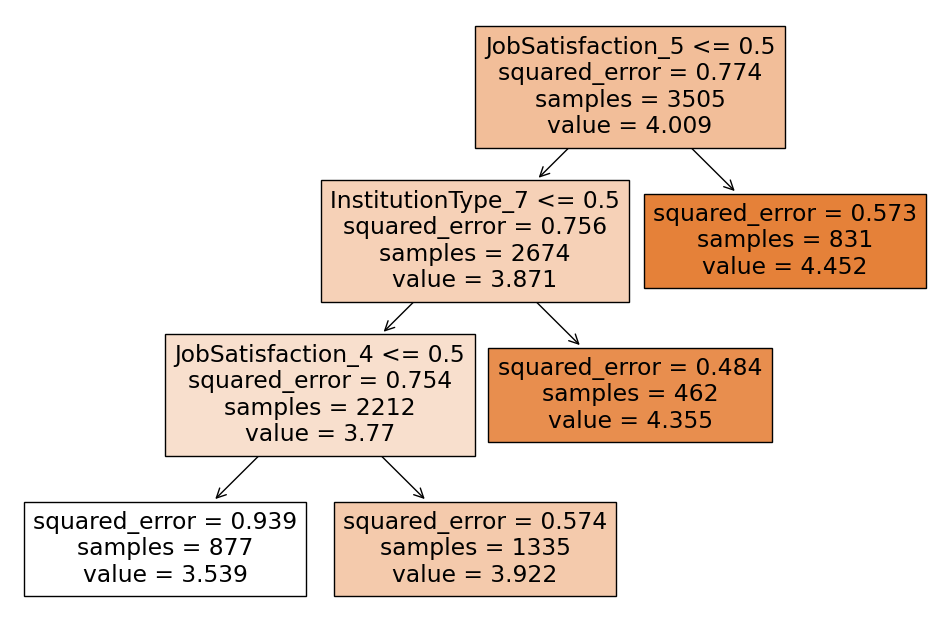

In [ ]:
# Example usage for predicting y1
dt_model_y1, test_r2, test_mse = run_decision_tree_model(X, y1)
results['DecisionTree_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}

####X on y2

R^2 on Training Data: 0.311
R^2 on Test Data: 0.362
MSE on Training Data: 0.660
MSE on Test Data: 0.592


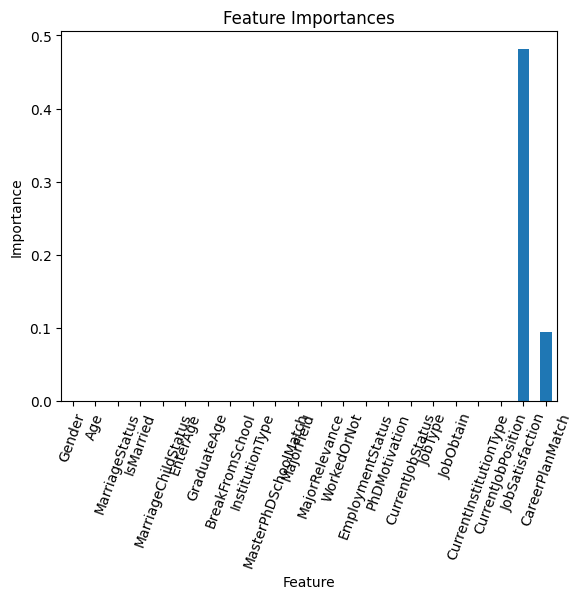

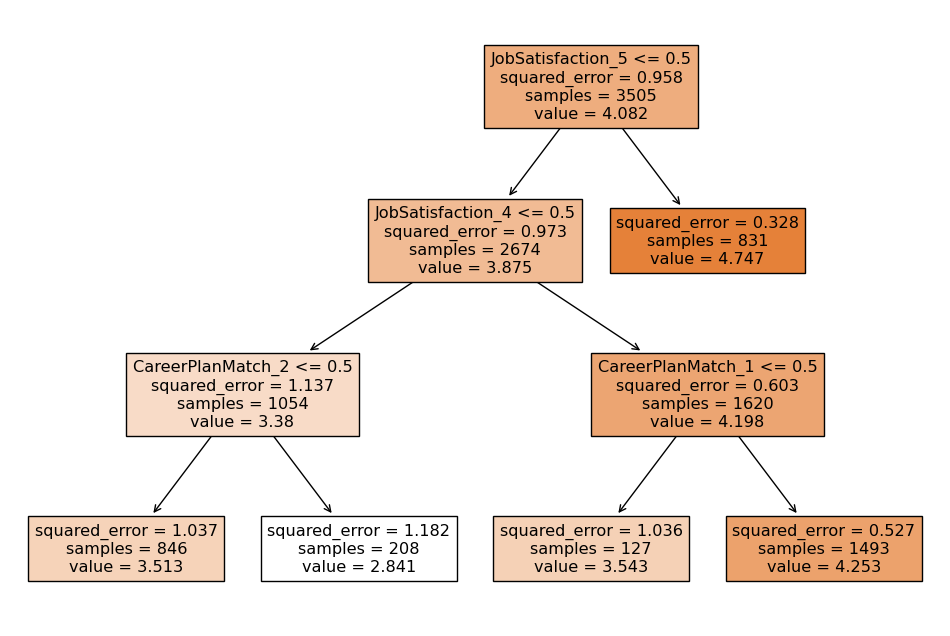

In [ ]:
# Example usage for predicting y2
dt_model_y2, test_r2, test_mse = run_decision_tree_model(X, y2)
results['DecisionTree_y2'] = {
    'r2': r2_test,
    'mse': mse_test
}

## Pruned trees

In [ ]:

def run_pruned_decision_tree(X,y, param_grid, splitter, test_size=0.25, random_state=48, scoring='r2'):
  # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state)

    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])

    # Define Decision Tree Estimator
    dt_estimator = DecisionTreeRegressor(criterion='squared_error', random_state=42)

    dt_pipeline = Pipeline(steps=[
        ("transformer", transformer),
        ("estimator", dt_estimator)
    ])

    dt_searcher = GridSearchCV(estimator=dt_pipeline, param_grid=param_grid, scoring=scoring, cv=splitter, refit=True)

    dt_searcher.fit(X_train, y_train)

    best_dt_pipeline = dt_searcher.best_estimator_

    y_train_pred = best_dt_pipeline.predict(X_train)
    y_test_pred = best_dt_pipeline.predict(X_test)

    print("R^2 on Training Set: %.3f" % r2_score(y_train, y_train_pred))
    print("R^2 on Test Set: %.3f" % r2_score(y_test, y_test_pred))
    print("MSE on Training Data: %.3f" % mean_squared_error(y_train, y_train_pred))
    print("MSE on Test Data: %.3f" % mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    feature_names = best_dt_pipeline.named_steps['transformer'].get_feature_names_out()
    feature_importances = best_dt_pipeline.named_steps['estimator'].feature_importances_

    plt.figure(figsize=(32, 8))
    plt.bar(feature_names, feature_importances)
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
    plt.show()

    return best_dt_pipeline, dt_searcher.best_params_, r2_test,mse_test

In [ ]:

#parameter grid for pruning
param_grid = {
    "estimator__ccp_alpha":np.linspace(0, .1, 100)}

#建立5折的splitter
splitter = KFold(
    n_splits = 5,
    shuffle = True,
    random_state = 48)

####X on y1

R^2 on Training Set: 0.221
R^2 on Test Set: 0.191
MSE on Training Data: 0.603
MSE on Test Data: 0.636


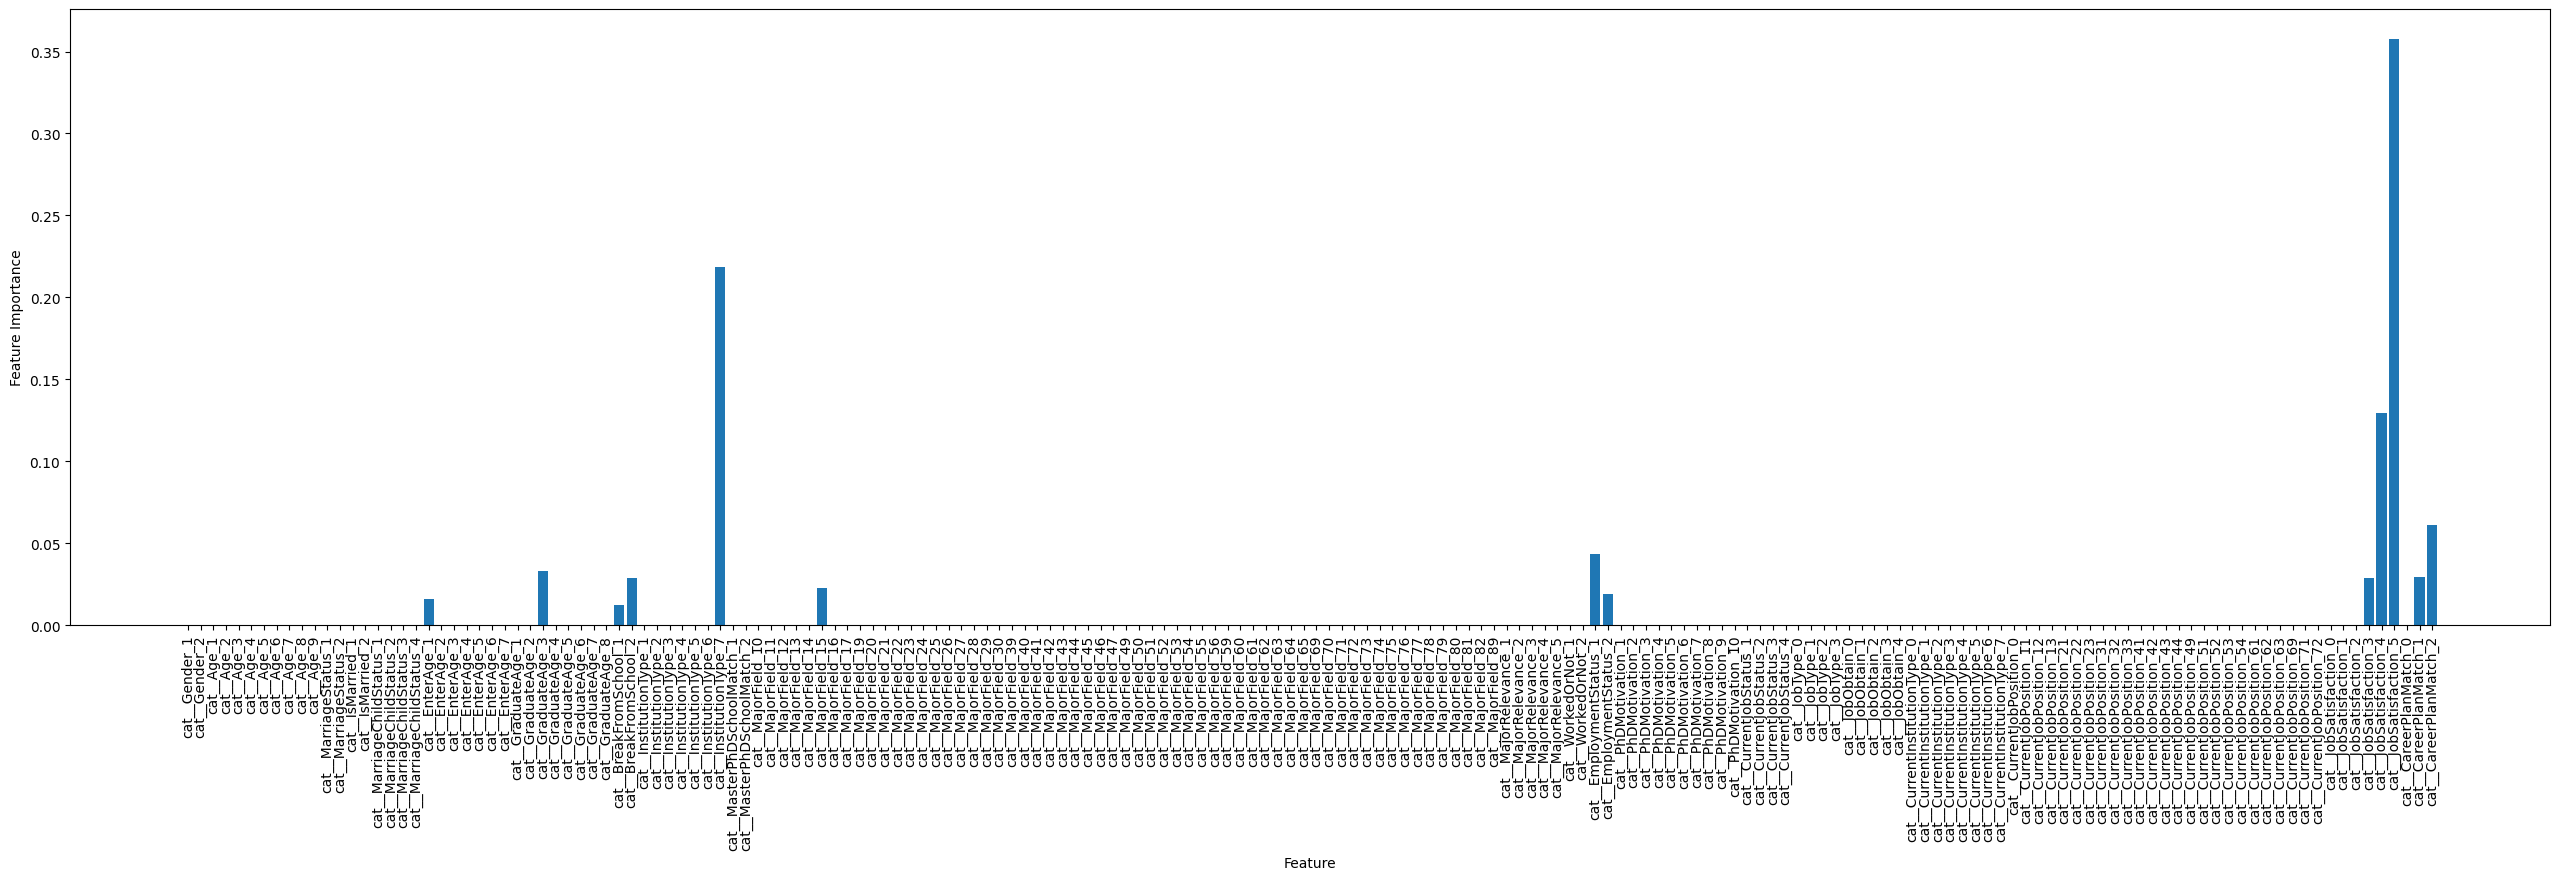

In [ ]:
pruned_model_y1, params_y1, r2_test, mse_test = run_pruned_decision_tree(X, y1, param_grid, splitter)
results['PrunedTrees_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}

#### X on y2

R^2 on Training Set: 0.347
R^2 on Test Set: 0.372
MSE on Training Data: 0.625
MSE on Test Data: 0.583


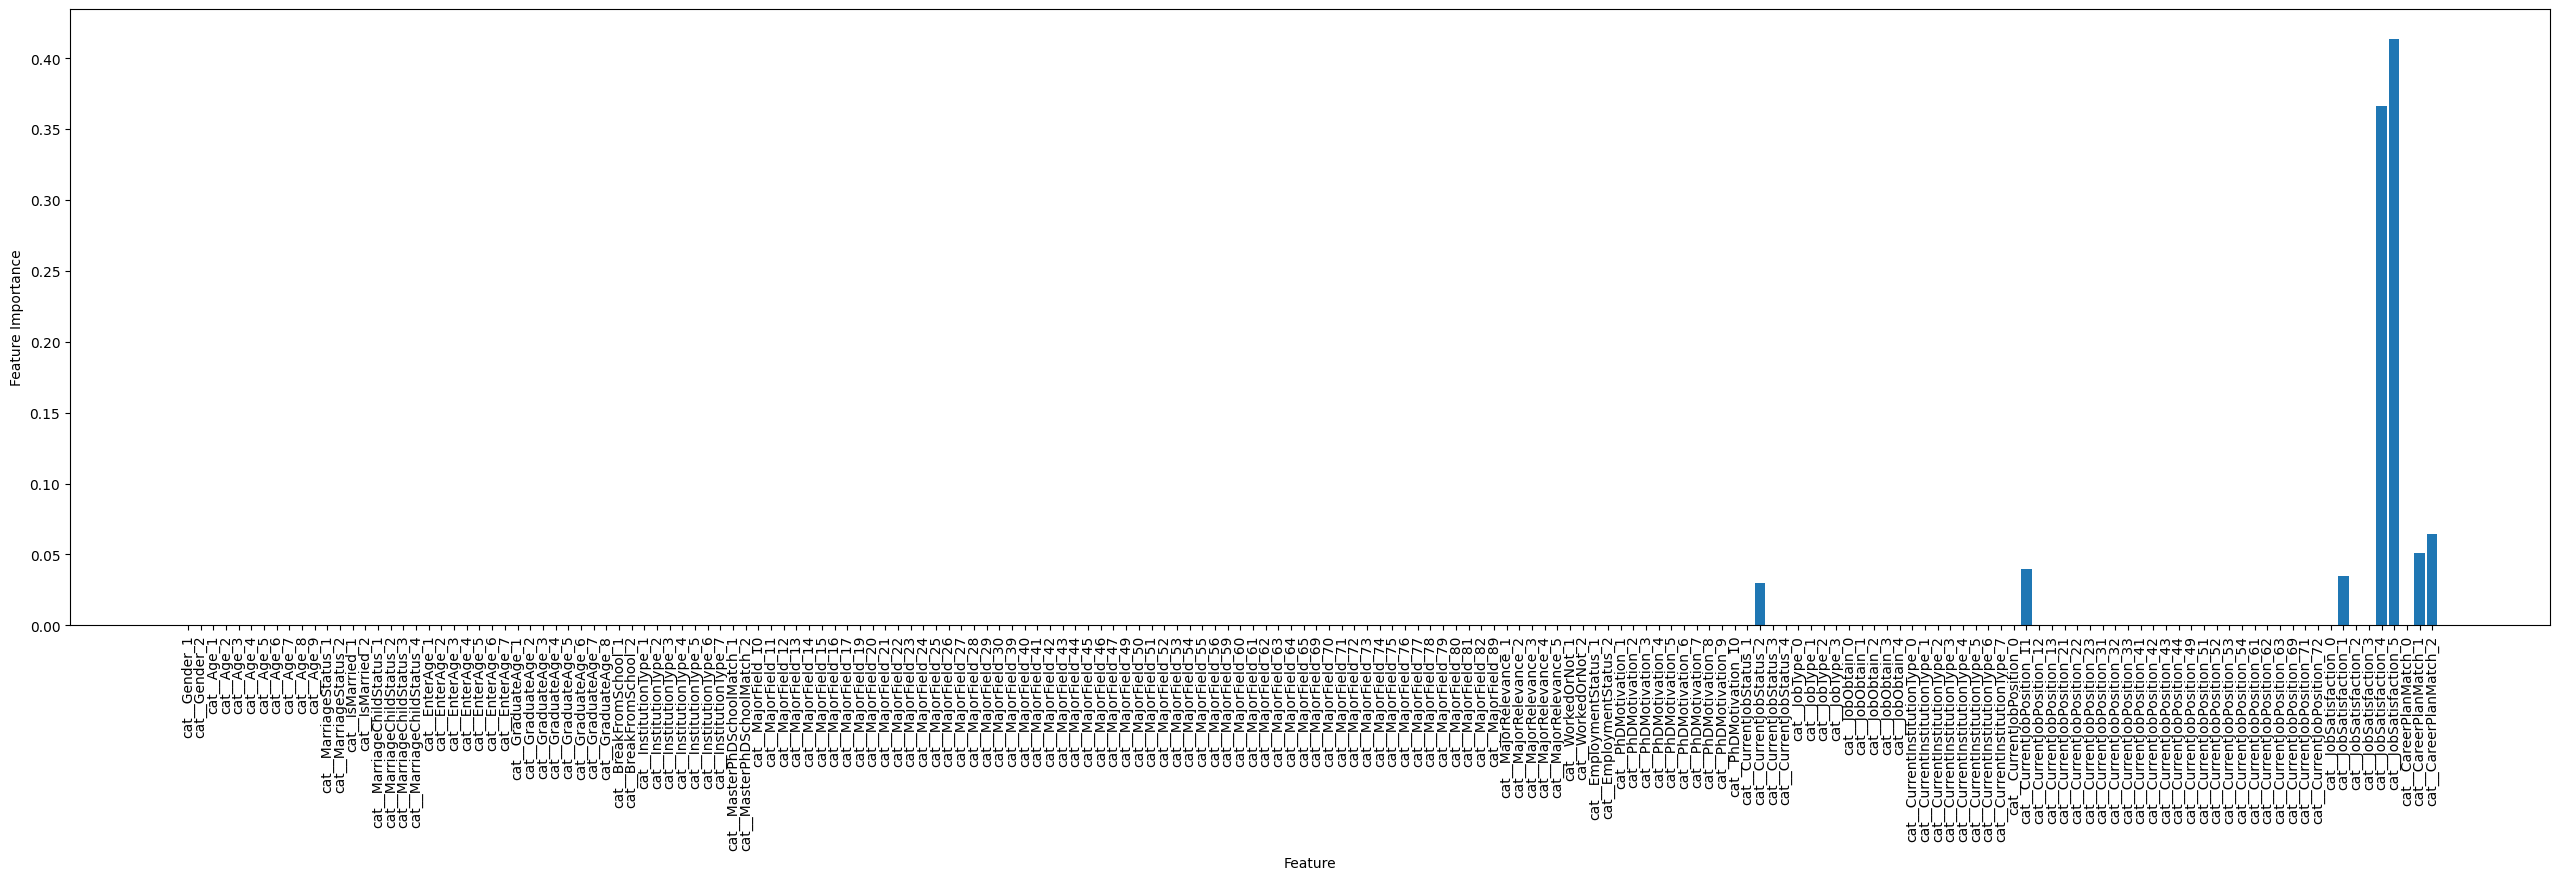

In [ ]:
pruned_model_y2, params_y2, r2_test, mse_test = run_pruned_decision_tree(X, y2, param_grid, splitter)
results['PrunedTrees_y2'] = {
    'r2': r2_test,
    'mse': mse_test
}

## Random forest

R^2 on Training Data: 0.881
R^2 on Test Data: 0.201


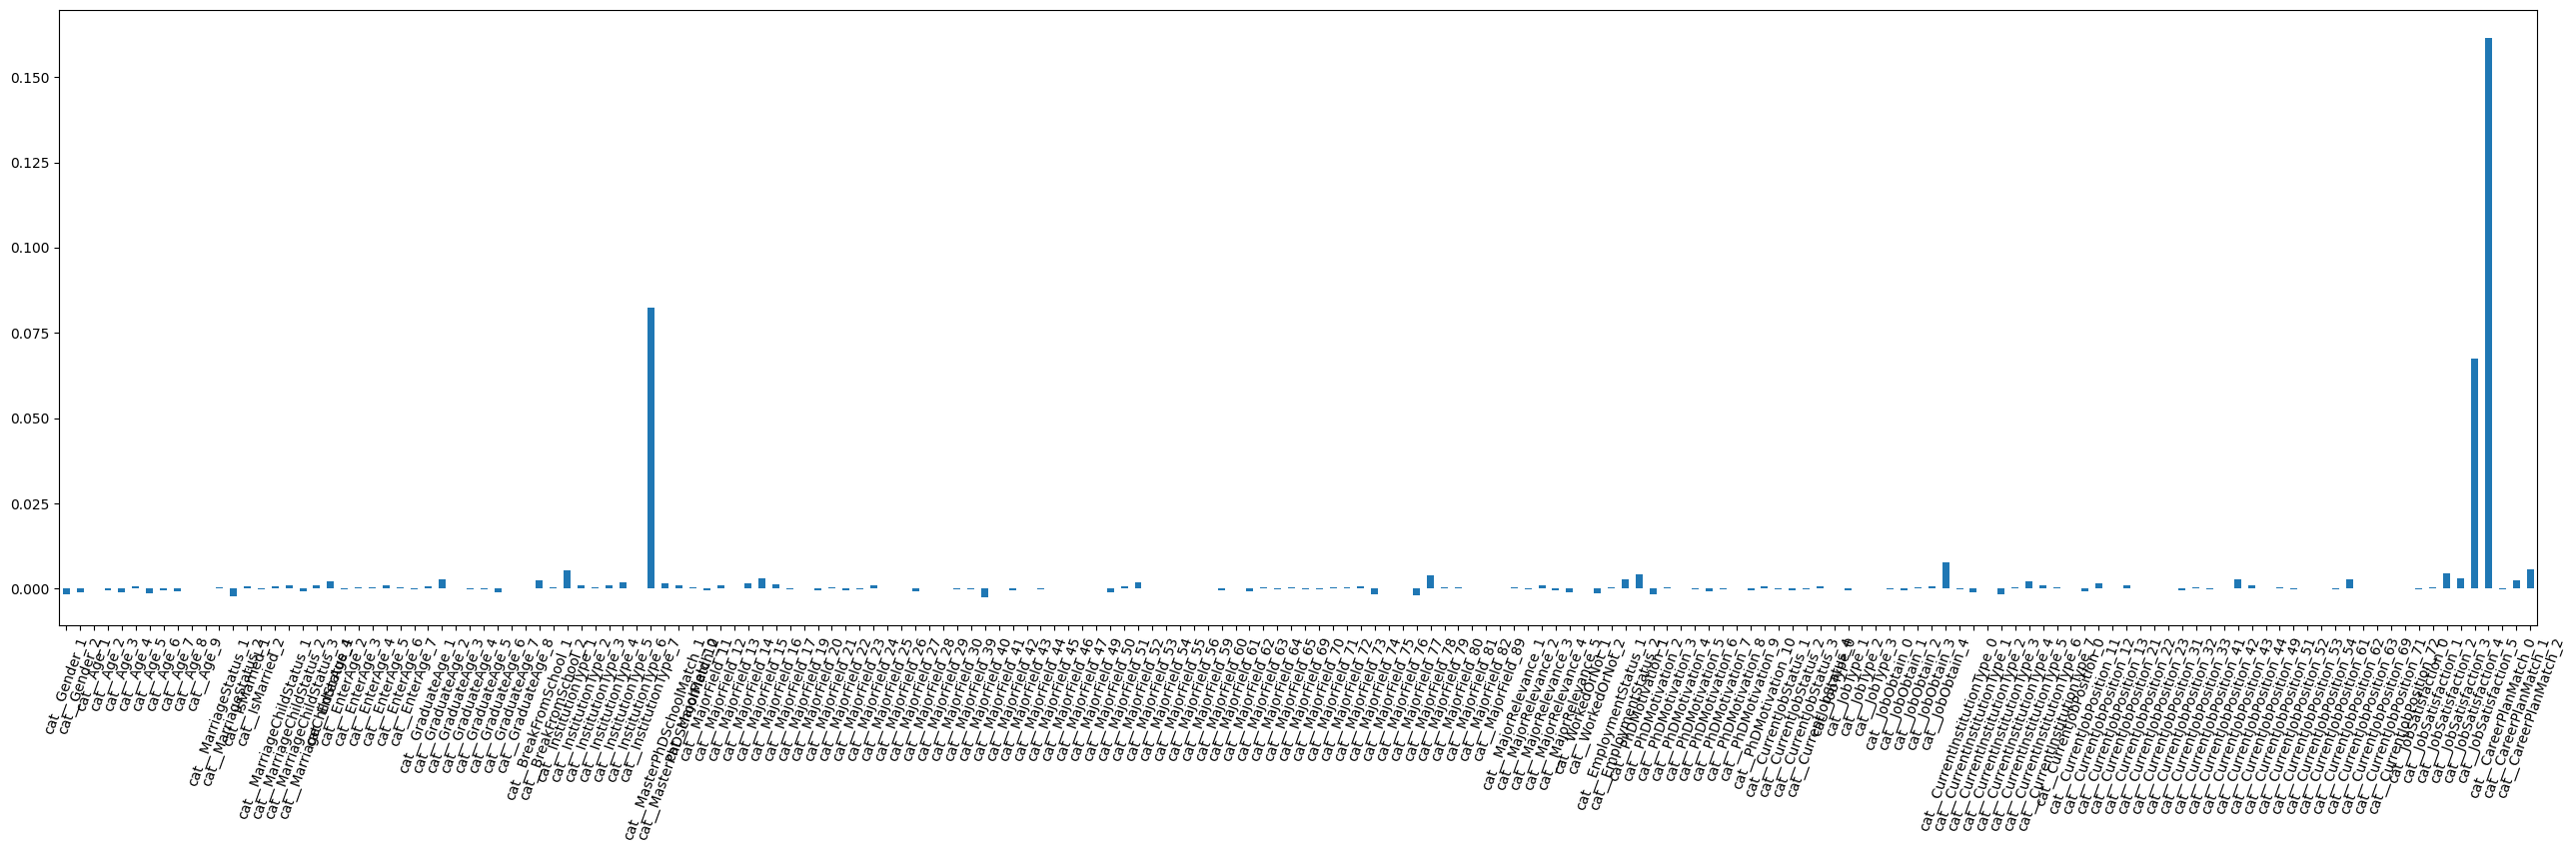

In [ ]:
def run_random_forest_model(X, y, test_size=0.25, random_state=48, n_splits=5, n_repeats=100):
    # Convert y to a Pandas Series
    y = pd.Series(y)

    # Check if y is categorical for stratification
    stratify = y if y.nunique() < 10 else None

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=stratify)
    # Set up the Column Transformer
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
        ])

    # Transform the training and testing data
    X_train_transformed = transformer.fit_transform(X_train).toarray()
    X_test_transformed = transformer.transform(X_test).toarray()

    # Set up the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the model
    rf_model.fit(X_train_transformed, y_train)

    # Evaluate the model
    print("R^2 on Training Data: %.3f" % rf_model.score(X_train_transformed, y_train))
    print("R^2 on Test Data: %.3f" % rf_model.score(X_test_transformed, y_test))

    # Extract the transformed feature names
    feature_names = transformer.get_feature_names_out(X.columns)

    # Plot feature importances using permutation importance
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    rf_pfi_sklearn = permutation_importance(
        rf_model,
        X_test_transformed,
        y_test,
        scoring=mse_scorer,
        n_repeats=n_repeats,
        random_state=random_state)

    importances_mean = rf_pfi_sklearn.importances_mean
    mse_test = mean_squared_error(y_test, rf_model.predict(X_test_transformed))
    r2_test = r2_score(y_test, rf_model.predict(X_test_transformed))

    # Check if the lengths match
    if len(importances_mean) != len(feature_names):
        raise ValueError("Length of importances does not match length of feature names")

    plt.figure(figsize=(32, 8))
    _ = pd.Series(importances_mean, index=feature_names).plot.bar(rot=70)
    plt.show()

    return rf_model,r2_test, mse_test

rf_modely1, r2_test, mse_test = run_random_forest_model(X, y1)
results['RandomForest_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}

####X and y1

R^2 on Training Data: 0.881
R^2 on Test Data: 0.201


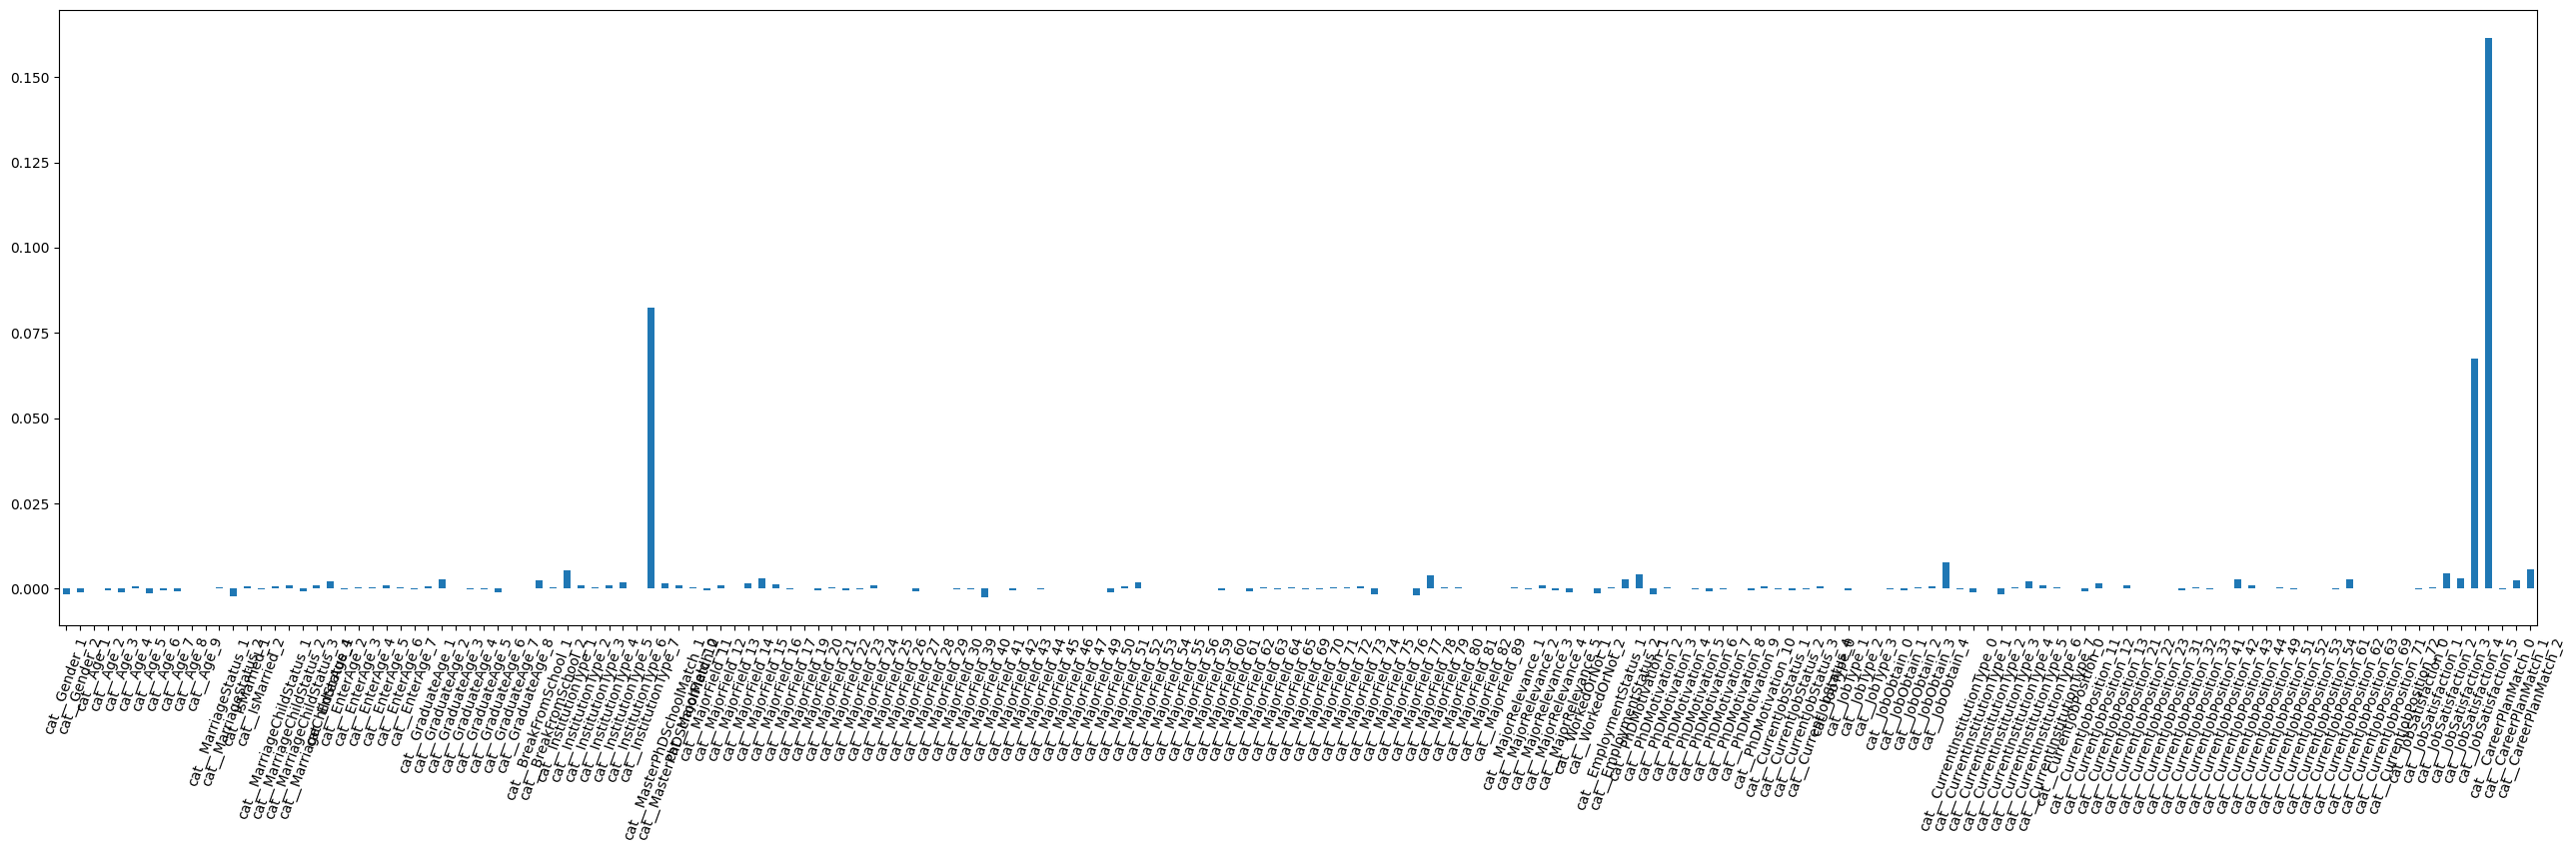

In [ ]:

# Run the Random Forest model
rf_modely1, r2_test, mse_test = run_random_forest_model(X, y1)
results['RandomForest_y1'] = {
    'r2': r2_test,
    'mse': mse_test
}

####X and y2

R^2 on Training Data: 0.907
R^2 on Test Data: 0.393


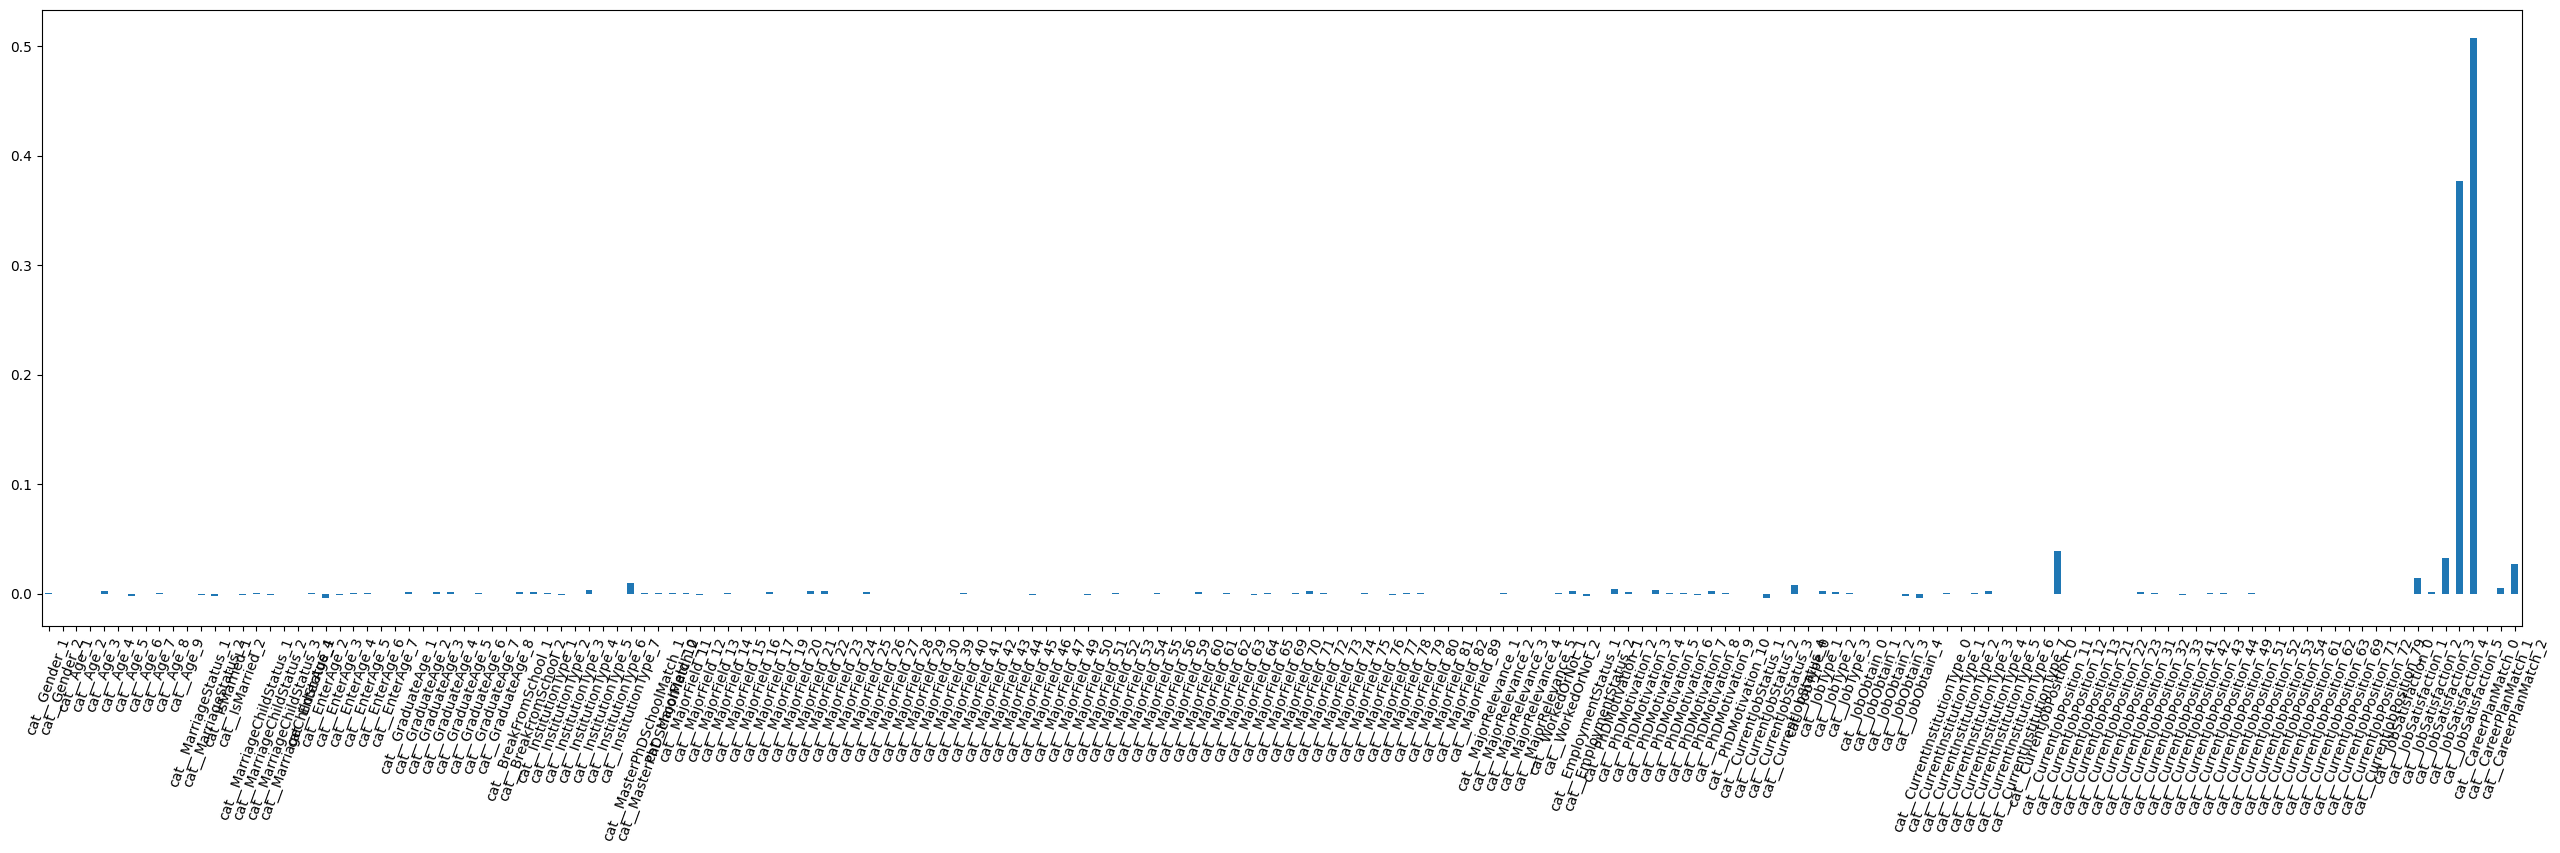

In [ ]:

# Run the Random Forest model
rf_modely2, r2_test, mse_test = run_random_forest_model(X, y2)
results['RandomForest_y2'] = {
    'r2': r2_test,
    'mse': mse_test
}

#Compare the Model Performances

In [ ]:
summary = pd.DataFrame(results).T

# Rename the columns for clarity
summary.columns = ['R2', 'MSE']

# Display the summary table
print(summary)

                       R2       MSE
linear_modely1   0.223046  0.610495
linear_modely2   0.433524  0.525906
lasso_modely1    0.239236  0.597774
lasso_modely2    0.446527  0.513835
Ridge_y1         0.227821  0.606744
KNN_y1           0.131212  0.673205
KNN_y2           0.251508  0.710044
DecisionTree_y2  0.251508  0.710044
DecisionTree_y1  0.251508  0.710044
PrunedTrees_y1   0.190832  0.635808
PrunedTrees_y2   0.371869  0.583146
RandomForest_y1  0.200984  0.619140
RandomForest_y2  0.392544  0.576252
Ridge_y2         0.436727  0.522933


##prediction

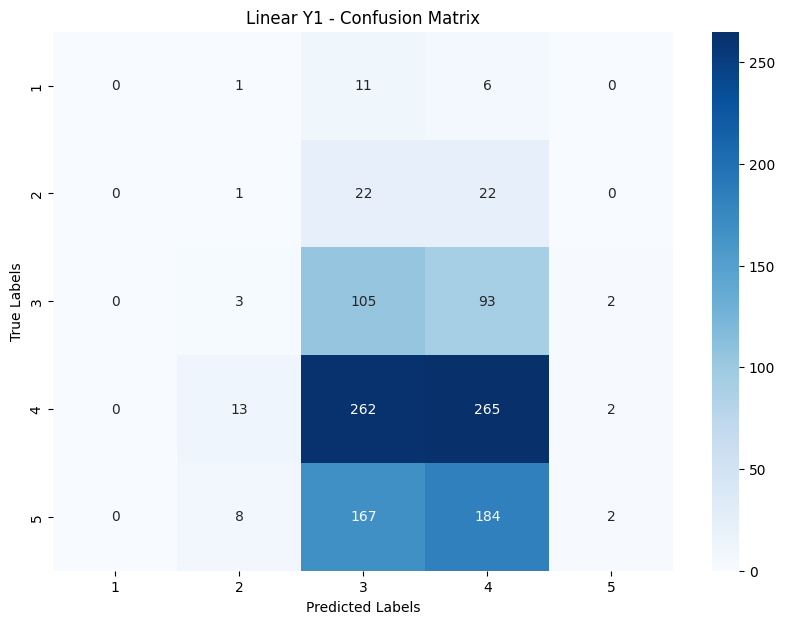

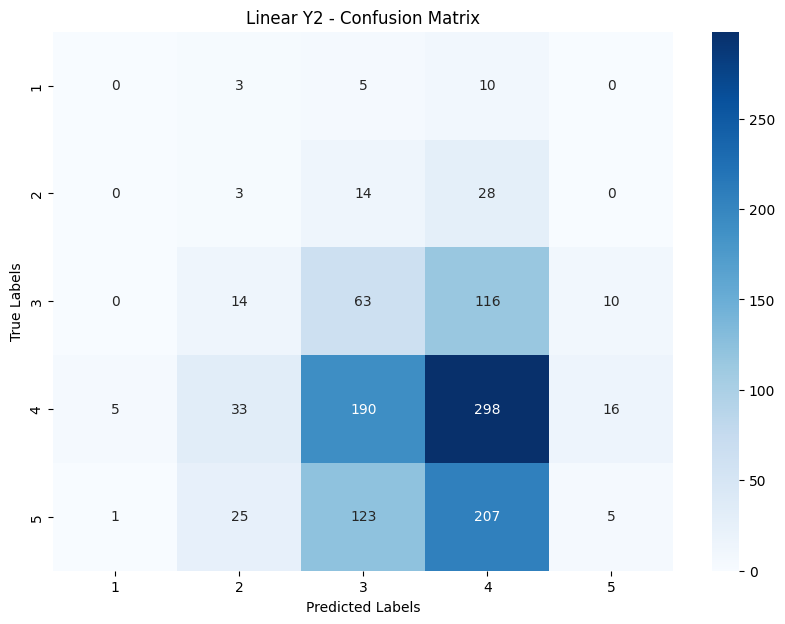

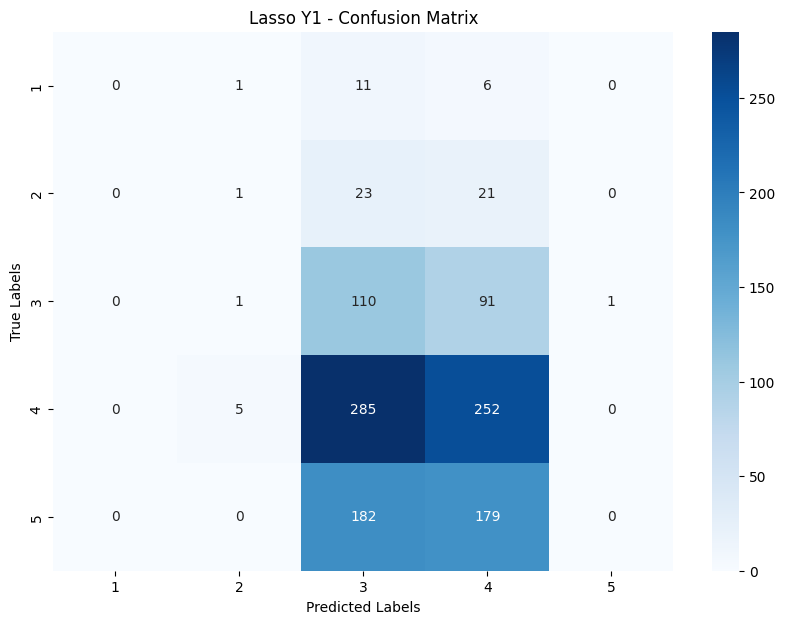

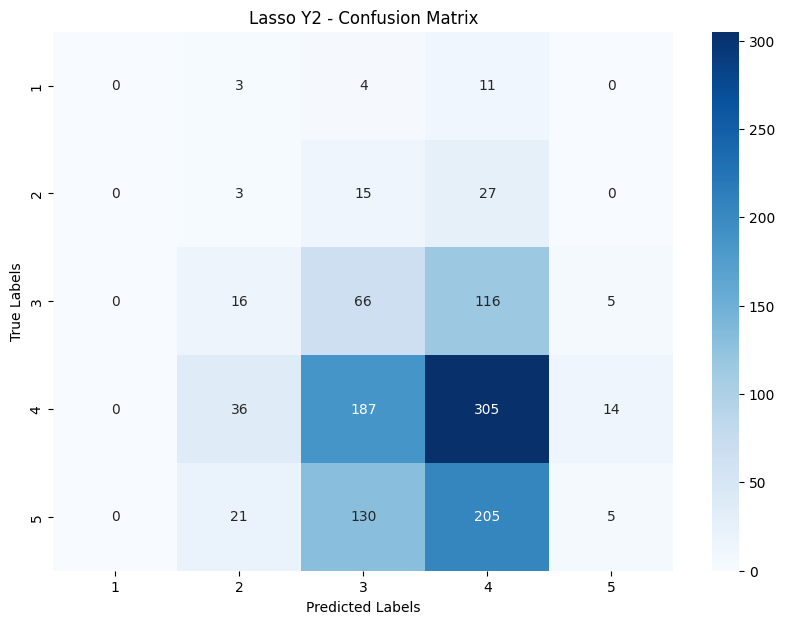

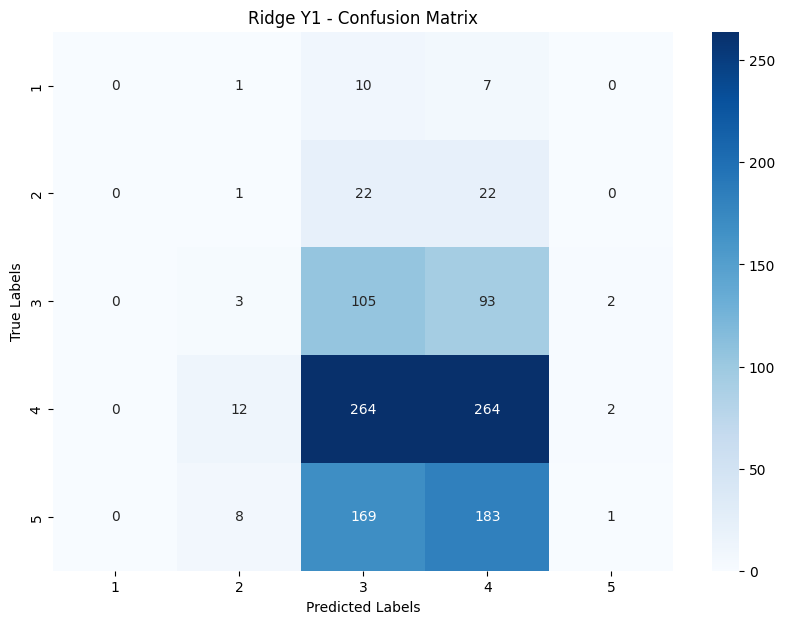

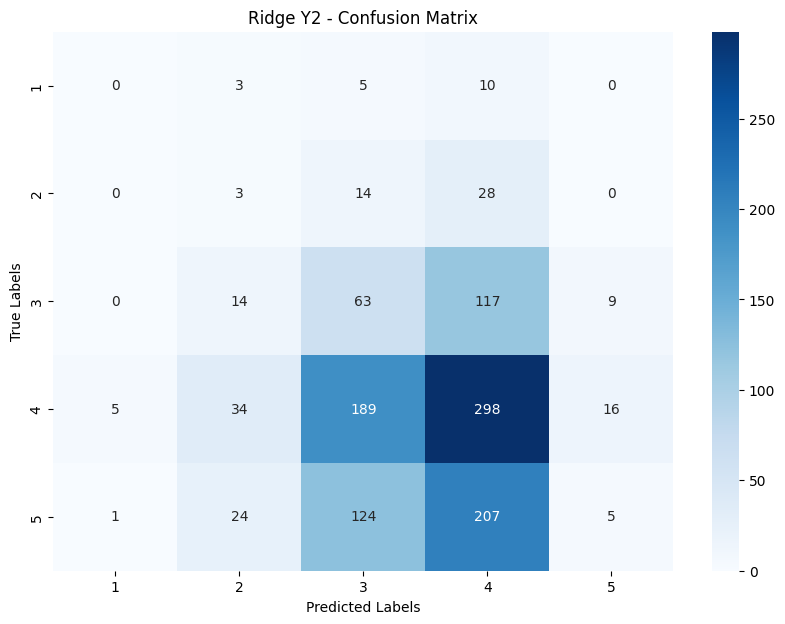

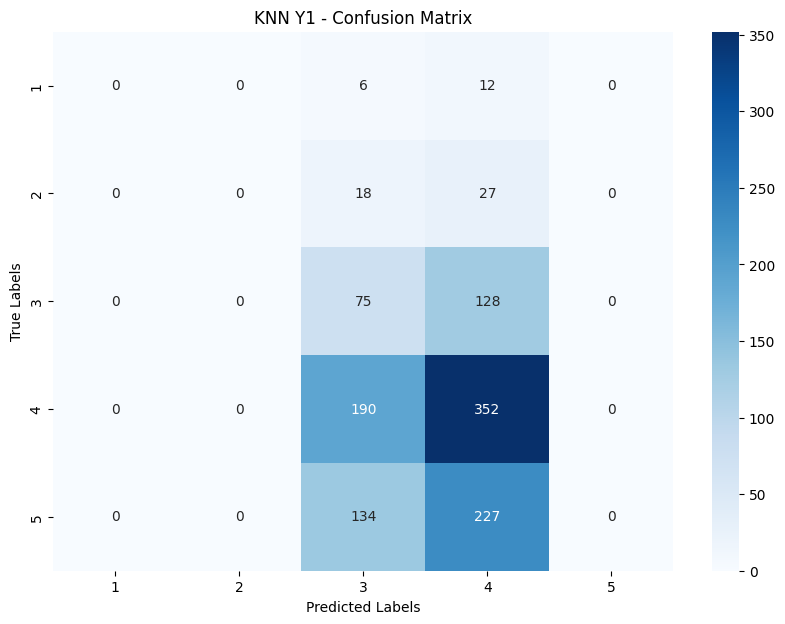

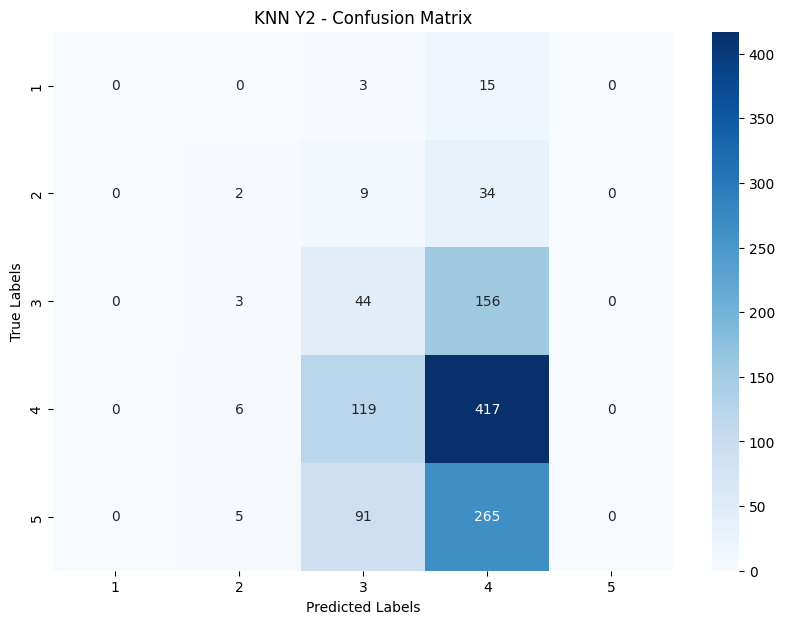

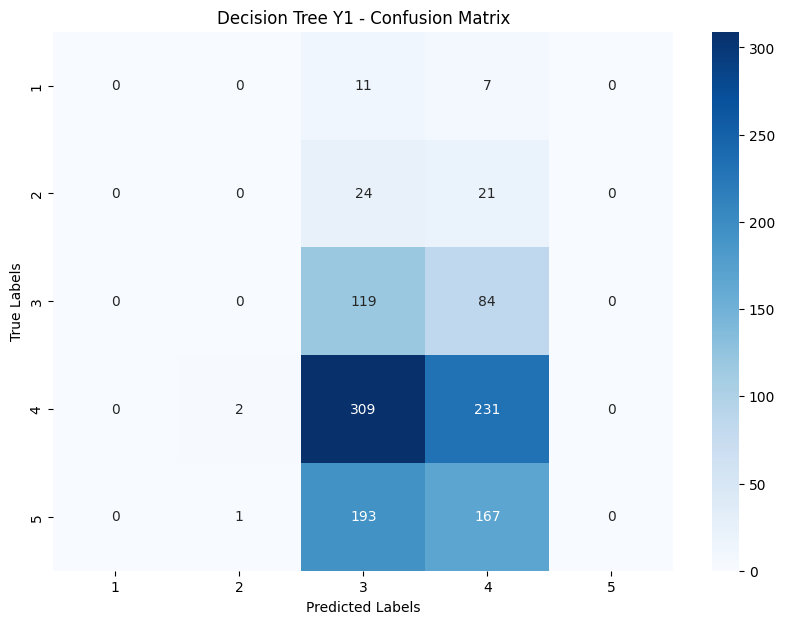

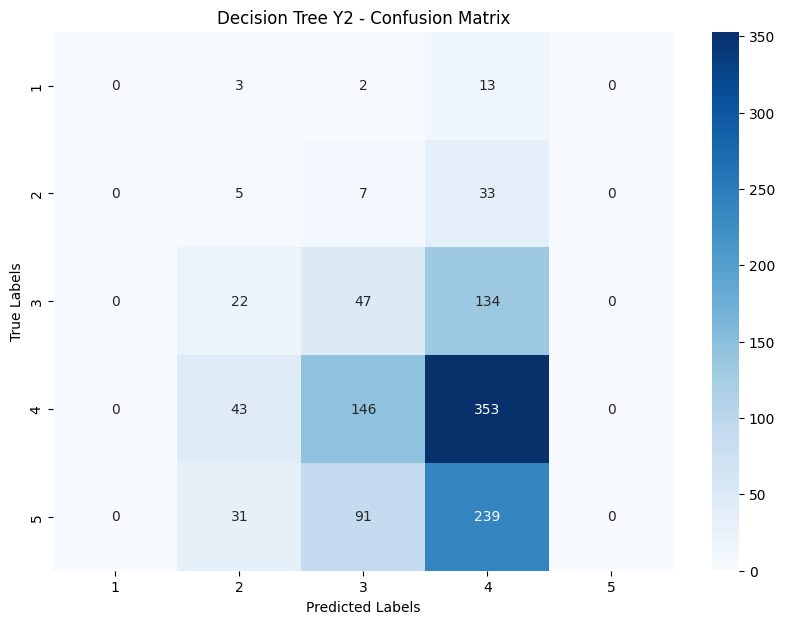

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'ColumnTransformer'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()


def predict_and_plot(X_test, y_test):
    # Set up the Column Transformer
    transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_test.columns)
        ])

    # Transform the test data
    X_test_transformed = transformer.fit_transform(X_test).toarray()
 #   X_test_transformed = transformer.transform(X_test).toarray()
    # Predictions
    linear_y1_pred = linear_modely1.predict(X_test)
    linear_y2_pred = linear_modely2.predict(X_test)

    lasso_y1_pred = lasso_modely1.predict(X_test)
    lasso_y2_pred = lasso_modely2.predict(X_test)

    ridge_y1_pred = ridge_modely1.predict(X_test)
    ridge_y2_pred = ridge_modely2.predict(X_test)

    knn_y1_pred = knn_model_y1.predict(X_test)
    knn_y2_pred = knn_model_y2.predict(X_test)

    dt_y1_pred = dt_model_y1.predict(X_test)
    dt_y2_pred = dt_model_y2.predict(X_test)

    pruned_dt_y1_pred = pruned_model_y1.predict(X_test)
    pruned_dt_y2_pred = pruned_model_y2.predict(X_test)


   # rf_y1_pred = rf_modely1.predict(X_test_transformed)
   # rf_y2_pred = rf_modely2.predict(X_test_transformed)
    models = {
        "Linear Y1": linear_y1_pred,
        "Linear Y2": linear_y2_pred,
        "Lasso Y1": lasso_y1_pred,
        "Lasso Y2": lasso_y2_pred,
        "Ridge Y1": ridge_y1_pred,
        "Ridge Y2": ridge_y2_pred,
        "KNN Y1": knn_y1_pred,
        "KNN Y2": knn_y2_pred,
        "Decision Tree Y1": dt_y1_pred,
        "Decision Tree Y2": dt_y2_pred,
        "Pruned Decision Tree Y1": pruned_model_y1,
        "Pruned Decision Tree Y2": pruned_model_y2,
    #    "Random Forest Y1": rf_y1_pred,
     #   "Random Forest Y2": rf_y2_pred
    }
    for model_name, y_pred in models.items():
      le = LabelEncoder()
      y_test_encoded = le.fit_transform(y_test)  # Encode the true labels
      y_pred_encoded = le.transform(y_pred)  # Ensure predictions are encoded
      cm = confusion_matrix(y_test_encoded, y_pred_encoded, labels=np.unique(y_test_encoded))
      plt.figure(figsize=(10, 7))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
      plt.title(f"{model_name} - Confusion Matrix")
      plt.xlabel("Predicted Labels")
      plt.ylabel("True Labels")
      plt.show()

    return models

# Usage
predicted_values = predict_and_plot(X_test, y1_test)